In [1]:
from keras.models import Sequential
from keras.layers import Dense
import numpy
# fix random seed for reproducibility
numpy.random.seed(7)

Using TensorFlow backend.


In [2]:
dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

In [3]:
X

array([[   6.   ,  148.   ,   72.   , ...,   33.6  ,    0.627,   50.   ],
       [   1.   ,   85.   ,   66.   , ...,   26.6  ,    0.351,   31.   ],
       [   8.   ,  183.   ,   64.   , ...,   23.3  ,    0.672,   32.   ],
       ..., 
       [   5.   ,  121.   ,   72.   , ...,   26.2  ,    0.245,   30.   ],
       [   1.   ,  126.   ,   60.   , ...,   30.1  ,    0.349,   47.   ],
       [   1.   ,   93.   ,   70.   , ...,   30.4  ,    0.315,   23.   ]])

In [4]:
Y

array([ 1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,
        1.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  1.,  1.,  1.,
        1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,
        1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,
        0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,
        0.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
        1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,
        0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  1.,  1.,  1.,
        0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  1.,
        1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,
        0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,
        0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  0

In [5]:
import numpy as np
np.shape(X)

(768, 8)

In [6]:
np.shape(Y)

(768,)

In [7]:
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X, Y, epochs=150, batch_size=10)
# evaluate the model
scores = model.evaluate(X, Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/150
768/768 [==============================] - 0s - loss: 3.7409 - acc: 0.5990     
Epoch 2/150
768/768 [==============================] - 0s - loss: 0.9437 - acc: 0.5898     
Epoch 3/150
768/768 [==============================] - 0s - loss: 0.7504 - acc: 0.6484     
Epoch 4/150
768/768 [==============================] - 0s - loss: 0.7129 - acc: 0.6589     
Epoch 5/150
768/768 [==============================] - 0s - loss: 0.6837 - acc: 0.6706     
Epoch 6/150
768/768 [==============================] - 0s - loss: 0.6516 - acc: 0.6823     
Epoch 7/150
768/768 [==============================] - 0s - loss: 0.6510 - acc: 0.6810     
Epoch 8/150
768/768 [==============================] - 0s - loss: 0.6393 - acc: 0.6862     
Epoch 9/150
768/768 [==============================] - 0s - loss: 0.6248 - acc: 0.6940     
Epoch 10/150
768/768 [==============================] - 0s - loss: 0.6303 - acc: 0.6771     
Epoch 11/150
768/768 [==============================] - 0s - loss: 0.6461 - acc

In [8]:
scores

[0.46762904897332191, 0.79817708333333337]

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

Using TensorFlow backend.


In [2]:
# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
import numpy as np
np.shape(x_train)

(60000, 28, 28)

In [6]:
np.shape(x_train[0])

(28, 28)

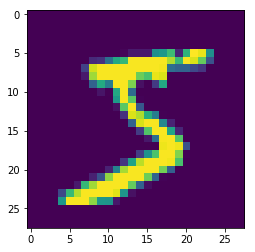

In [13]:
from matplotlib import pyplot as plt
plt.imshow(x_train[0])
plt.show()

In [14]:
y_train[0]

5

In [15]:
np.shape(x_train)

(60000, 28, 28)

In [16]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [18]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [33]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0],28, 28,1)

In [34]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [35]:
np.shape(X_train)

(60000, 28, 28, 1)

In [22]:
X_train[0]

array([[[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.  

In [24]:
X_train[0][0]

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.    

In [25]:
y_train.shape

(60000,)

In [26]:
model = Sequential()

In [27]:
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(1,28,28)))

NameError: name 'Convolution2D' is not defined

In [8]:
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

In [9]:
Y_train

array([ 1.,  1.,  1., ...,  6.,  6.,  6.])

In [29]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [30]:
Y_train.shape

(60000, 10)

In [31]:
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(1,28,28)))

/home/bhumihar/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(1, 28, 28..., activation="relu")`
  if __name__ == '__main__':


ValueError: Negative dimension size caused by subtracting 3 from 1 for 'conv2d_1/convolution' (op: 'Conv2D') with input shapes: [?,1,28,28], [3,3,28,32].

In [37]:
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(28,28,1)))

In [38]:
model.output_shape

(None, 26, 26, 32)

In [39]:
# 7. Define model architecture
model = Sequential()
 
model.add(Convolution2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
 

In [ ]:
# 8. Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
 
# 9. Fit model on training data
model.fit(X_train, Y_train, 
          batch_size=32, nb_epoch=10, verbose=1)
 
# 10. Evaluate model on test data
score = model.evaluate(X_test, Y_test, verbose=0)

/home/bhumihar/anaconda3/lib/python3.5/site-packages/keras/models.py:837: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/10
52000/60000 [=========================>....] - ETA: 45s - loss: 0.7932 - acc: 0.7391

In [7]:
import numpy as np
A_img = np.zeros((3,50,50,3), dtype=np.float)

In [9]:
a = ['1','2','3']
np.size(a)

3

In [10]:
import numpy as np
A_img = np.zeros((3,2,2,2), dtype=np.float)

In [11]:
A_img[0,:,:,:] = np.array([[[1,2],[3,4]],[[5,6],[7,8]]])

In [37]:
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D ,Convolution3D ,MaxPooling3D
from keras.utils import np_utils
import numpy as np

In [2]:
npzfile = np.load("gesture_train.npy")
npzfile.files
X_train = npzfile['X_train']
Y_train = npzfile['Y_train']

['X_train', 'Y_train']

In [4]:
npzfile['X_train']

array([[[[ 194.,  177.,  178.],
         [ 194.,  176.,  177.],
         [ 193.,  175.,  176.],
         ..., 
         [ 110.,  119.,  108.],
         [ 167.,  180.,  170.],
         [ 171.,  186.,  177.]],

        [[ 187.,  174.,  175.],
         [ 188.,  176.,  177.],
         [ 187.,  175.,  177.],
         ..., 
         [ 109.,  118.,  105.],
         [ 167.,  180.,  167.],
         [ 172.,  189.,  176.]],

        [[ 189.,  177.,  176.],
         [ 187.,  178.,  175.],
         [ 185.,  177.,  173.],
         ..., 
         [ 123.,  130.,  122.],
         [ 165.,  175.,  167.],
         [ 175.,  186.,  178.]],

        ..., 
        [[ 173.,  148.,  143.],
         [ 174.,  147.,  142.],
         [ 176.,  148.,  142.],
         ..., 
         [ 123.,  139.,  146.],
         [ 112.,  128.,  136.],
         [ 125.,  140.,  149.]],

        [[ 169.,  147.,  141.],
         [ 171.,  148.,  142.],
         [ 171.,  148.,  141.],
         ..., 
         [ 123.,  138.,  141.],
       

In [5]:
X_train = npzfile['X_train']
Y_train = npzfile['Y_train']

In [6]:
np.shape(X_train)

(4872, 50, 50, 3)

In [7]:
np.shape(Y_train)

(4872,)

In [12]:
Y_train

array([ 1.,  1.,  1., ...,  6.,  6.,  6.])

In [13]:
np.shape(Y_train)

(4872,)

In [15]:
Y_train = np_utils.to_categorical(Y_train, 10)

In [17]:
Y_train

array([[ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [18]:
np.shape(Y_train)

(4872, 10)

In [19]:
print(Y_train)

[[ 0.  1.  0. ...,  0.  0.  0.]
 [ 0.  1.  0. ...,  0.  0.  0.]
 [ 0.  1.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [20]:
X_train = npzfile['X_train']
Y_train = npzfile['Y_train']

In [21]:
Y_train

array([ 1.,  1.,  1., ...,  6.,  6.,  6.])

In [23]:
np.unique(Y_train)

array([ 1.,  2.,  3.,  4.,  5.,  6.])

In [24]:
y_train = np_utils.to_categorical(Y_train)

In [25]:
y_train

array([[ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.]])

In [26]:
np.shape(y_train)

(4872, 7)

In [27]:
np.shape(X_train)

(4872, 50, 50, 3)

In [28]:
# 7. Define model architecture
model = Sequential()
 
model.add(Convolution3D(50, kernel_size=(3, 3), activation='relu', input_shape=(50,50,1)))
model.add(Convolution3D(50, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


NameError: name 'Sequential' is not defined

In [38]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [30]:
# 7. Define model architecture
model = Sequential()
 
model.add(Convolution2D(50, kernel_size=(3, 3), activation='relu', input_shape=(50,50,1)))
model.add(Convolution2D(50, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [31]:
npzfile = np.load("gesture_test.npy")
npzfile.files

['Y_test', 'X_test']

In [33]:
npzfile['X_test']

array([[[[ 114.,  129.,  127.],
         [ 110.,  130.,  127.],
         [ 109.,  128.,  125.],
         ..., 
         [  75.,   91.,   94.],
         [  72.,   87.,   93.],
         [  74.,   85.,   93.]],

        [[ 110.,  129.,  126.],
         [ 108.,  127.,  124.],
         [ 108.,  124.,  124.],
         ..., 
         [  65.,   92.,   90.],
         [  68.,   89.,   90.],
         [  72.,   88.,   90.]],

        [[ 104.,  128.,  125.],
         [ 104.,  127.,  125.],
         [ 107.,  124.,  127.],
         ..., 
         [  71.,   90.,   92.],
         [  74.,   92.,   94.],
         [  76.,   87.,   92.]],

        ..., 
        [[  89.,  101.,  106.],
         [  90.,  102.,  108.],
         [  88.,  100.,  107.],
         ..., 
         [  59.,   69.,   74.],
         [  61.,   69.,   73.],
         [  63.,   70.,   73.]],

        [[  96.,  104.,  112.],
         [  94.,  102.,  109.],
         [  91.,   99.,  107.],
         ..., 
         [  56.,   64.,   75.],
       

In [34]:
npzfile = np.load("gesture_train.npy")
npzfile.files
X_train = npzfile['X_train']
Y_train = npzfile['Y_train']
npzfile = np.load("gesture_test.npy")
X_test = npzfile['X_test']
Y_test = npzfile['Y_test']

In [35]:
y_test = np_utils.to_categorical(Y_test)

In [36]:
# 8. Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
 
# 9. Fit model on training data
model.fit(X_train, y_train, 
          batch_size=32, nb_epoch=10, verbose=1)
# 10. Evaluate model on test data
score = model.evaluate(X_test, y_test, verbose=0)

/home/bhumihar/anaconda3/lib/python3.5/site-packages/keras/models.py:837: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


ValueError: Error when checking input: expected conv2d_1_input to have shape (None, 50, 50, 1) but got array with shape (4872, 50, 50, 3)

In [40]:
# 7. Define model architecture
model = Sequential()
 
model.add(Convolution3D(50, kernel_size=(3, 3,3), activation='relu', input_shape=(50,50,3)))
model.add(Convolution3D(50, kernel_size=(3, 3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# 8. Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
 
# 9. Fit model on training data
model.fit(X_train, y_train, 
          batch_size=32, nb_epoch=10, verbose=1)
# 10. Evaluate model on test data
score = model.evaluate(X_test, y_test, verbose=0)

ValueError: Input 0 is incompatible with layer conv3d_2: expected ndim=5, found ndim=4

In [47]:
import numpy as np
import cv2 
import os 
from matplotlib import pyplot
from scipy.misc import toimage



            ############ Code to convert train image into matrix ###############
a_img_list = os.listdir('/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/A')
b_img_list = os.listdir('/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/B')
c_img_list = os.listdir('/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/C')
f_img_list = os.listdir('/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/Five')
p_img_list = os.listdir('/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/Point')
v_img_list = os.listdir('/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/V')

A_image = np.zeros((np.shape(a_img_list)[0],50,50),dtype=np.float)
A_value = np.zeros((np.shape(a_img_list)[0]),dtype=np.float)
i =0 ;
for img in a_img_list :
    file_name = "/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/A/"+img ;
    image = cv2.imread(file_name)
    if(image.shape!=(50,50,3)) :
        image = cv2.resize(image, (50, 50))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    A_image[i,:,:] = image
    A_value[i] = 1;
    i = i+1
    
B_image = np.zeros((np.shape(b_img_list)[0],50,50),dtype=np.float)
B_value = np.zeros((np.shape(b_img_list)[0]),dtype=np.float)
i =0 ;
for img in b_img_list :
    file_name = "/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/B/"+img ;
    image = cv2.imread(file_name)
    if(image.shape!=(50,50,3)) :
        image = cv2.resize(image, (50, 50))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    B_image[i,:,:] = image
    B_value[i] = 1;
    i = i+1
    
C_image = np.zeros((np.shape(c_img_list)[0],50,50),dtype=np.float)
C_value = np.zeros((np.shape(c_img_list)[0]),dtype=np.float)
i =0 ;
for img in c_img_list :
    file_name = "/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/C/"+img ;
    image = cv2.imread(file_name)
    if(image.shape!=(50,50,3)) :
        image = cv2.resize(image, (50, 50))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    C_image[i,:,:] = image
    C_value[i] = 1;
    i = i+1
    
F_image = np.zeros((np.shape(f_img_list)[0],50,50),dtype=np.float)
F_value = np.zeros((np.shape(f_img_list)[0]),dtype=np.float)
i =0 ;
for img in f_img_list :
    file_name = "/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/Five/"+img ;
    image = cv2.imread(file_name)
    if(image.shape!=(50,50,3)) :
        image = cv2.resize(image, (50, 50))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    F_image[i,:,:] = image
    F_value[i] = 1;
    i = i+1

P_image = np.zeros((np.shape(p_img_list)[0],50,50),dtype=np.float)
P_value = np.zeros((np.shape(p_img_list)[0]),dtype=np.float)
i =0 ;
for img in p_img_list :
    file_name = "/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/Point/"+img ;
    image = cv2.imread(file_name)
    if(image.shape!=(50,50,3)) :
        image = cv2.resize(image, (50, 50))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    P_image[i,:,:] = image
    P_value[i] = 1;
    i = i+1
    
V_image = np.zeros((np.shape(v_img_list)[0],50,50),dtype=np.float)
V_value = np.zeros((np.shape(v_img_list)[0]),dtype=np.float)
i =0 ;
for img in v_img_list :
    file_name = "/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/V/"+img ;
    image = cv2.imread(file_name)
    if(image.shape!=(50,50,3)) :
        image = cv2.resize(image, (50, 50))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    V_image[i,:,:] = image
    V_value[i] = 1;
    i = i+1
    
print(np.shape(A_image))
print(np.shape(B_image))
print(np.shape(C_image))
print(np.shape(F_image))
print(np.shape(P_image))
print(np.shape(V_image))

X_train = np.zeros((np.shape(A_image)[0] +np.shape(B_image)[0] +np.shape(C_image)[0] 
                   +np.shape(F_image)[0] +np.shape(P_image)[0] +np.shape(V_image)[0],50,50),dtype=np.float)
Y_train = np.zeros((np.shape(A_image)[0] +np.shape(B_image)[0] +np.shape(C_image)[0] 
                   +np.shape(F_image)[0] +np.shape(P_image)[0] +np.shape(V_image)[0]),dtype=np.float)


j =0;
i=0 ;
X_train[j:np.shape(A_image)[0],:,:] = A_image ;
Y_train[j:np.shape(A_image)[0]] = 1
j = j+ np.shape(A_image)[0] ;
X_train[j:j+np.shape(B_image)[0],:,:] = B_image ;
Y_train[j:j+np.shape(B_image)[0]] = 2
j = j+ np.shape(B_image)[0] ;
X_train[j:j+np.shape(C_image)[0],:,:] = C_image ;
Y_train[j:j+np.shape(C_image)[0]] = 3
j = j+ np.shape(C_image)[0] ;
X_train[j:j+np.shape(F_image)[0],:,:] = F_image ;
Y_train[j:j+np.shape(F_image)[0]] = 4
j = j+ np.shape(F_image)[0] ;
X_train[j:j+np.shape(P_image)[0],:,:] = P_image ;
Y_train[j:j+np.shape(P_image)[0]] = 5
j = j+ np.shape(P_image)[0] ;
X_train[j:j+np.shape(V_image)[0],:,:] = V_image ;
Y_train[j:j+np.shape(V_image)[0]] = 6
j = j+ np.shape(V_image)[0] ;
file = open("gesture_gray_train.npy", "wb")
np.savez(file, X_train=X_train,Y_train=Y_train)

(1329, 50, 50)
(487, 50, 50)
(572, 50, 50)
(654, 50, 50)
(1395, 50, 50)
(435, 50, 50)


In [46]:
            ############ Code to convert test image into matrix ###############
            
a_img_list = os.listdir('/home/bhumihar/Programming/Python/opencv/sample/Marcel-Test/A/uniform')
b_img_list = os.listdir('/home/bhumihar/Programming/Python/opencv/sample/Marcel-Test/B/uniform')
c_img_list = os.listdir('/home/bhumihar/Programming/Python/opencv/sample/Marcel-Test/C/uniform')
f_img_list = os.listdir('/home/bhumihar/Programming/Python/opencv/sample/Marcel-Test/Five/uniform')
p_img_list = os.listdir('/home/bhumihar/Programming/Python/opencv/sample/Marcel-Test/Point/uniform')
v_img_list = os.listdir('/home/bhumihar/Programming/Python/opencv/sample/Marcel-Test/V/uniform')

A_image = np.zeros((np.shape(a_img_list)[0],50,50),dtype=np.float)
A_value = np.zeros((np.shape(a_img_list)[0]),dtype=np.float)
i =0 ;
for img in a_img_list :
    file_name = "/home/bhumihar/Programming/Python/opencv/sample/Marcel-Test/A/uniform/"+img ;
    image = cv2.imread(file_name)
    if(image.shape!=(50,50,3)) :
        image = cv2.resize(image, (50, 50))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    A_image[i,:,:] = image
    A_value[i] = 1;
    i = i+1
    
B_image = np.zeros((np.shape(b_img_list)[0],50,50),dtype=np.float)
B_value = np.zeros((np.shape(b_img_list)[0]),dtype=np.float)
i =0 ;
for img in b_img_list :
    file_name = "/home/bhumihar/Programming/Python/opencv/sample/Marcel-Test/B/uniform/"+img ;
    image = cv2.imread(file_name)
    if(image.shape!=(50,50,3)) :
        image = cv2.resize(image, (50, 50))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    B_image[i,:,:] = image
    B_value[i] = 2;
    i = i+1
    
C_image = np.zeros((np.shape(c_img_list)[0],50,50),dtype=np.float)
C_value = np.zeros((np.shape(c_img_list)[0]),dtype=np.float)
i =0 ;
for img in c_img_list :
    file_name = "/home/bhumihar/Programming/Python/opencv/sample/Marcel-Test/C/uniform/"+img ;
    image = cv2.imread(file_name)
    if(image.shape!=(50,50,3)) :
        image = cv2.resize(image, (50, 50))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    C_image[i,:,:] = image
    C_value[i] = 3;
    i = i+1
    
F_image = np.zeros((np.shape(f_img_list)[0],50,50),dtype=np.float)
F_value = np.zeros((np.shape(f_img_list)[0]),dtype=np.float)
i =0 ;
for img in f_img_list :
    file_name = "/home/bhumihar/Programming/Python/opencv/sample/Marcel-Test/Five/uniform/"+img ;
    image = cv2.imread(file_name)
    if(image.shape!=(50,50,3)) :
        image = cv2.resize(image, (50, 50))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    F_image[i,:,:] = image
    F_value[i] = 4;
    i = i+1

P_image = np.zeros((np.shape(p_img_list)[0],50,50),dtype=np.float)
P_value = np.zeros((np.shape(p_img_list)[0]),dtype=np.float)
i =0 ;
for img in p_img_list :
    file_name = "/home/bhumihar/Programming/Python/opencv/sample/Marcel-Test/Point/uniform/"+img ;
    image = cv2.imread(file_name)
    if(image.shape!=(50,50,3)) :
        image = cv2.resize(image, (50, 50))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    P_image[i,:,:] = image
    P_value[i] = 5;
    i = i+1
    
V_image = np.zeros((np.shape(v_img_list)[0],50,50),dtype=np.float)
V_value = np.zeros((np.shape(v_img_list)[0]),dtype=np.float)
i =0 ;
for img in v_img_list :
    file_name = "/home/bhumihar/Programming/Python/opencv/sample/Marcel-Test/V/uniform/"+img ;
    image = cv2.imread(file_name)
    if(image.shape!=(50,50,3)) :
        image = cv2.resize(image, (50, 50))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    V_image[i,:,:] = image
    V_value[i] = 6;
    i = i+1

#print(np.shape(A_image))
#print(np.shape(B_image))
#print(np.shape(C_image))
#print(np.shape(F_image))
#print(np.shape(P_image))
#print(np.shape(V_image))

X_test = np.zeros((np.shape(A_image)[0] +np.shape(B_image)[0] +np.shape(C_image)[0] 
                   +np.shape(F_image)[0] +np.shape(P_image)[0] +np.shape(V_image)[0],50,50),dtype=np.float)
Y_test = np.zeros((np.shape(A_image)[0] +np.shape(B_image)[0] +np.shape(C_image)[0] 
                   +np.shape(F_image)[0] +np.shape(P_image)[0] +np.shape(V_image)[0]),dtype=np.float)

j =0;
i=0 ;
X_test[j:np.shape(A_image)[0],:,:] = A_image ;
Y_test[j:np.shape(A_image)[0]] = 1
j = j+ np.shape(A_image)[0] ;
X_test[j:j+np.shape(B_image)[0],:,:] = B_image ;
Y_test[j:j+np.shape(B_image)[0]] = 2
j = j+ np.shape(B_image)[0] ;
X_test[j:j+np.shape(C_image)[0],:,:] = C_image ;
Y_test[j:j+np.shape(C_image)[0]] = 3
j = j+ np.shape(C_image)[0] ;
X_test[j:j+np.shape(F_image)[0],:,:] = F_image ;
Y_test[j:j+np.shape(F_image)[0]] = 4
j = j+ np.shape(F_image)[0] ;
X_test[j:j+np.shape(P_image)[0],:,:] = P_image ;
Y_test[j:j+np.shape(P_image)[0]] = 5
j = j+ np.shape(P_image)[0] ;
X_test[j:j+np.shape(V_image)[0],:,:] = V_image ;
Y_test[j:j+np.shape(V_image)[0]] = 6
j = j+ np.shape(V_image)[0] ;


      ######## Code to write train data into  file ######
file = open("gesture_gray_test.npy", "wb")
np.savez(file, X_test=X_test,Y_test=Y_test)
file.seek(0)
npzfile = np.load("gesture_test.npy")
npzfile.files

['Y_test', 'X_test']

Train Image Dataset Matrix Size
(4872, 50, 50)
(4872,)
Test Image Dataset Matrix Size
(382, 50, 50)
(382,)


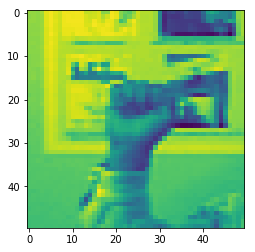

1.0


In [48]:
print('Train Image Dataset Matrix Size')
print(np.shape(X_train))
print(np.shape(Y_train))

print('Test Image Dataset Matrix Size')
print(np.shape(X_test))
print(np.shape(Y_test))


pyplot.imshow(toimage(X_train[0]))
pyplot.show()
print(Y_train[0])

In [49]:
npzfile = np.load("gesture_gray_train.npy")
X_train ,Y_train = npzfile['X_train'] ,npzfile['Y_train']
npzfile = np.load("gesture_gray_test.npy")
X_test ,Y_test = npzfile['X_test'] ,npzfile['Y_test']

In [50]:
y_train = np_utils.to_categorical(Y_train)
y_test = np_utils.to_categorical(Y_test)

In [51]:
# 7. Define model architecture
model = Sequential()
 
model.add(Convolution2D(50, kernel_size=(3, 3), activation='relu', input_shape=(50,50,1)))
model.add(Convolution2D(50, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# 8. Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
 
# 9. Fit model on training data
model.fit(X_train, y_train, 
          batch_size=32, nb_epoch=10, verbose=1)
# 10. Evaluate model on test data
score = model.evaluate(X_test, y_test, verbose=0)

/home/bhumihar/anaconda3/lib/python3.5/site-packages/keras/models.py:837: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


ValueError: Error when checking input: expected conv2d_3_input to have 4 dimensions, but got array with shape (4872, 50, 50)

In [53]:
X_train = X_train.reshape(X_train.shape[0], 50, 50,1)
X_test = X_test.reshape(X_test.shape[0],50, 50,1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [54]:
np.shape(X_train)

(4872, 50, 50, 1)

In [55]:
np.shape(X_test)

(382, 50, 50, 1)

In [56]:
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')

In [61]:
npzfile = np.load("gesture_train.npy")
X_train = npzfile['X_train']
Y_train = npzfile['Y_train']
npzfile = np.load("gesture_test.npy")
X_test = npzfile['X_test']
Y_test = npzfile['Y_test']

X_train = X_train.reshape(X_train.shape[0], 50, 50,3)
X_test = X_test.reshape(X_test.shape[0],50, 50,3)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

y_train = np_utils.to_categorical(Y_train)
y_test = np_utils.to_categorical(Y_test)
num_classes = y_test.shape[1]

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(3, 50, 50), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile model
epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_9 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 32, 16, 16)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_10 (Dropout)         (None, 512)               0         
__________

In [62]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

ValueError: Error when checking input: expected conv2d_9_input to have shape (None, 3, 32, 32) but got array with shape (4872, 50, 50, 3)

In [1]:
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')

Using TensorFlow backend.


In [3]:
import numpy as np
npzfile = np.load("gesture_train.npy")
X_train = npzfile['X_train']
Y_train = npzfile['Y_train']
npzfile = np.load("gesture_test.npy")
X_test = npzfile['X_test']
Y_test = npzfile['Y_test']

X_train = X_train.reshape(X_train.shape[0], 50, 50,3)
X_test = X_test.reshape(X_test.shape[0],50, 50,3)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

y_train = np_utils.to_categorical(Y_train)
y_test = np_utils.to_categorical(Y_test)
num_classes = y_test.shape[1]

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(3, 50, 50), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile model
epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 50, 50)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 50, 50)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 50, 50)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 25, 25)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 20000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               10240512  
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
__________

In [4]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

ValueError: Error when checking input: expected conv2d_1_input to have shape (None, 3, 50, 50) but got array with shape (4872, 50, 50, 3)

In [5]:
import numpy as np
np.random.seed(123)
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [7]:
print(X_train.shape)

(60000, 28, 28)


In [8]:
from matplotlib import pyplot as plt
plt.imshow(X_train[0])

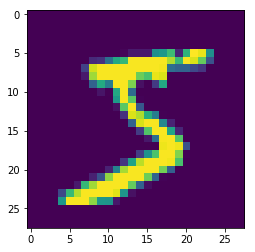

In [9]:
plt.show()

In [11]:
np.shape(X_train[0])

(28, 28)

In [13]:
X_train[0][0][0]

0

In [14]:
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)

In [15]:
print(X_train.shape)

(60000, 1, 28, 28)


In [16]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [17]:
print(y_train.shape)

(60000,)


In [18]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [19]:
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)

In [20]:
Y_train.shape

(60000, 10)

In [21]:
model = Sequential()
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(1,28,28)))

/home/bhumihar/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(1, 28, 28...)`
  from ipykernel import kernelapp as app


In [22]:
model.output_shape

(None, 32, 26, 26)

In [23]:
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

/home/bhumihar/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  if __name__ == '__main__':


In [24]:
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [26]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [7]:
import numpy as np
np.random.seed(123)  # for reproducibility
 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist


In [8]:
npzfile = np.load("gesture_gray_train.npy")
X_train = npzfile['X_train']
Y_train = npzfile['Y_train']
npzfile = np.load("gesture_gray_test.npy")
X_test = npzfile['X_test']
Y_test = npzfile['Y_test']

In [9]:
print(X_train.shape)

(4872, 50, 50)


In [10]:
np.shape(X_train[0])

(50, 50)

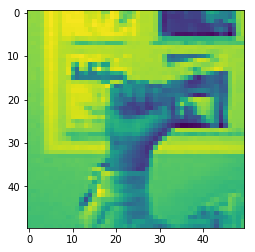

In [11]:
from matplotlib import pyplot as plt
plt.imshow(X_train[0])
plt.show()

In [12]:
X_train = X_train.reshape(X_train.shape[0], 1, 50, 50)
X_test = X_test.reshape(X_test.shape[0], 1, 50, 50)

In [13]:
X_train.shape

(4872, 1, 50, 50)

In [14]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [15]:
y_train.shape

(4872,)

In [16]:
y_train[:10]

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [17]:
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)

In [18]:
Y_train.shape

(4872, 7)

In [22]:
# 7. Define model architecture
model = Sequential()
 
model.add(Convolution2D(32,3,3, activation='relu', input_shape=(1,50,50)))

/home/bhumihar/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(1, 50, 50...)`


ValueError: Negative dimension size caused by subtracting 3 from 1 for 'conv2d_9/convolution' (op: 'Conv2D') with input shapes: [?,1,50,50], [3,3,50,32].

In [20]:
# 7. Define model architecture
model = Sequential()
 
model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(1,50,50)))
model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

ValueError: Negative dimension size caused by subtracting 3 from 1 for 'conv2d_7/convolution' (op: 'Conv2D') with input shapes: [?,1,50,50], [3,3,50,32].

In [50]:
# 8. Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# 9. Fit model on training data
model.fit(X_train, Y_train, 
          batch_size=32, nb_epoch=7, verbose=1)

/home/bhumihar/anaconda3/lib/python3.5/site-packages/keras/models.py:837: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/7
4576/4872 [===========================>..] - ETA: 7s - loss: 1.2044 - acc: 0.5450

In [25]:
# 3. Import libraries and modules
import numpy as np
np.random.seed(123)  # for reproducibility
 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist
 


In [1]:
import numpy as np
np.random.seed(123)  # for reproducibility
 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

Using TensorFlow backend.


In [4]:
npzfile = np.load("gesture_gray_train.npy")
X_train = npzfile['X_train']
y_train = npzfile['Y_train']
npzfile = np.load("gesture_gray_test.npy")
X_test = npzfile['X_test']
y_test = npzfile['Y_test']

In [6]:
# 5. Preprocess input data
X_train = X_train.reshape(X_train.shape[0], 1, 50,50)
X_test = X_test.reshape(X_test.shape[0], 1, 50, 50)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
 
# 6. Preprocess class labels
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)
 
# 7. Define model architecture
model = Sequential()
 
model.add(Convolution2D(32,(3, 3), activation='relu', input_shape=(50,50,1)))
model

In [18]:
# 1. Import libraries and modules
import numpy as np
np.random.seed(123)  # for reproducibility
 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
 
# 2. Load pre-shuffled IMAGE data into train and test sets
npzfile = np.load("gesture_gray_train.npy")
X_train = npzfile['X_train']
y_train = npzfile['Y_train']
npzfile = np.load("gesture_gray_test.npy")
X_test = npzfile['X_test']
y_test = npzfile['Y_test']
 
# 3. Preprocess input data
X_train = X_train.reshape(X_train.shape[0], 1, 50, 50)
X_test = X_test.reshape(X_test.shape[0], 1, 50, 50)
#X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
#X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
 
# 6. Preprocess class labels
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)
 
# 7. Define model architecture
model = Sequential()
 
model.add(Convolution2D(32,(3, 3), activation='relu', input_shape=(50,50,1)))
model.add(Convolution2D(32,(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
 
# 8. Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
 
# 9. Fit model on training data
model.fit(X_train, Y_train, 
          batch_size=32, nb_epoch=10, verbose=1)
 
# 10. Evaluate model on test data
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

/home/bhumihar/anaconda3/lib/python3.5/site-packages/keras/models.py:837: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


ValueError: Error when checking input: expected conv2d_19_input to have shape (None, 50, 50, 1) but got array with shape (4872, 1, 50, 50)

In [20]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

batch_size = 32
num_classes = 10
epochs = 200
data_augmentation = True

# The data, shuffled and split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [21]:
x_train.shape[1:]

(32, 32, 3)

In [28]:
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

batch_size = 32
num_classes = 6
epochs = 200
data_augmentation = True

# The data, shuffled and split between train and test sets:
npzfile = np.load("gesture_train.npy")
x_train = npzfile['X_train']
y_train = npzfile['Y_train']
npzfile = np.load("gesture_test.npy")
x_test = npzfile['X_test']
y_test = npzfile['Y_test']

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

model = Sequential()

model.add(Conv2D(32, (3, 3),input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(7))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

x_train shape: (4872, 50, 50, 3)
4872 train samples
382 test samples


In [ ]:
model.fit(x_train, y_train,
              batch_size=batch_size,epochs=epochs, verbose=1)

Epoch 1/200
4872/4872 [==============================] - 88s - loss: 1.6124 - acc: 0.3553    
Epoch 2/200
4872/4872 [==============================] - 95s - loss: 1.1963 - acc: 0.5616    
Epoch 3/200
4872/4872 [==============================] - 93s - loss: 0.8404 - acc: 0.7005    
Epoch 4/200
4872/4872 [==============================] - 99s - loss: 0.5635 - acc: 0.8163    
Epoch 5/200
4872/4872 [==============================] - 88s - loss: 0.4128 - acc: 0.8651    
Epoch 6/200
4872/4872 [==============================] - 84s - loss: 0.3316 - acc: 0.8933    
Epoch 7/200
4872/4872 [==============================] - 84s - loss: 0.2612 - acc: 0.9138    
Epoch 8/200
4872/4872 [==============================] - 84s - loss: 0.2159 - acc: 0.9314    
Epoch 9/200
4872/4872 [==============================] - 85s - loss: 0.1836 - acc: 0.9446    
Epoch 10/200
4872/4872 [==============================] - 93s - loss: 0.1569 - acc: 0.9526    
Epoch 11/200
4872/4872 [==============================] - 9

In [2]:
import keras
import numpy as np
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

batch_size = 32
num_classes = 10
epochs = 20
data_augmentation = True

# The data, shuffled and split between train and test sets:
npzfile = np.load("gesture_train.npy")
x_train = npzfile['X_train']
y_train = npzfile['Y_train']
npzfile = np.load("gesture_test.npy")
x_test = npzfile['X_test']
y_test = npzfile['Y_test']

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

model = Sequential()

model.add(Conv2D(32, (3, 3),input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(7))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
model.fit(x_train, y_train,
              batch_size=batch_size,epochs=epochs, verbose=1)
score = model.evaluate(x_test,y_test, verbose=0)
print(score)

x_train shape: (4872, 50, 50, 3)
4872 train samples
382 test samples
Epoch 1/20
4872/4872 [==============================] - 91s - loss: 1.6159 - acc: 0.3569    
Epoch 2/20
4872/4872 [==============================] - 87s - loss: 1.0959 - acc: 0.5967    
Epoch 3/20
4872/4872 [==============================] - 94s - loss: 0.7168 - acc: 0.7467    
Epoch 4/20
4872/4872 [==============================] - 100s - loss: 0.5259 - acc: 0.8222   
Epoch 5/20
4872/4872 [==============================] - 95s - loss: 0.3968 - acc: 0.8647    
Epoch 6/20
4872/4872 [==============================] - 97s - loss: 0.3150 - acc: 0.8996    
Epoch 7/20
4872/4872 [==============================] - 95s - loss: 0.2603 - acc: 0.9214    
Epoch 8/20
4872/4872 [==============================] - 97s - loss: 0.2077 - acc: 0.9380    
Epoch 9/20
4872/4872 [==============================] - 96s - loss: 0.1822 - acc: 0.9450    
Epoch 10/20
4872/4872 [==============================] - 103s - loss: 0.1539 - acc: 0.9526   


In [3]:
score = model.evaluate(x_test,y_test, verbose=1)

382/382 [==============================] - 2s     


In [4]:
score

[5.7044420417066641, 0.34031413612565448]

In [5]:
scores = model.evaluate(x_train,y_train)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

4864/4872 [============================>.] - ETA: 0s
acc: 98.81%


In [6]:
scores = model.evaluate(x_test,y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

382/382 [==============================] - 2s     

acc: 34.03%


In [1]:
import numpy as np
import cv2 
import os 
from matplotlib import pyplot
from scipy.misc import toimage



            ############ Code to convert train image into matrix ###############
a_img_list = os.listdir('/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/A')
b_img_list = os.listdir('/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/B')
c_img_list = os.listdir('/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/C')
f_img_list = os.listdir('/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/Five')
p_img_list = os.listdir('/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/Point')
v_img_list = os.listdir('/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/V')


for img in a_img_list :
    file_name = "/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/A/"+img ;
    image = cv2.imread(file_name)
    print(np.shape(image))

(76, 66, 3)
(82, 70, 3)
(76, 66, 3)
(84, 72, 3)
(80, 68, 3)
(90, 78, 3)
(82, 70, 3)
(320, 240, 3)
(76, 66, 3)
(88, 76, 3)
(288, 384, 3)
(88, 76, 3)
(288, 384, 3)
(82, 70, 3)
(88, 76, 3)
(288, 384, 3)
(80, 68, 3)
(76, 66, 3)
(76, 66, 3)
(76, 66, 3)
(80, 68, 3)
(76, 66, 3)
(82, 70, 3)
(80, 68, 3)
(88, 76, 3)
(80, 68, 3)
(80, 68, 3)
(82, 70, 3)
(84, 72, 3)
(88, 76, 3)
(84, 72, 3)
(84, 72, 3)
(76, 66, 3)
(76, 66, 3)
(82, 70, 3)
(82, 70, 3)
(90, 78, 3)
(90, 78, 3)
(76, 66, 3)
(88, 76, 3)
(76, 66, 3)
(82, 70, 3)
(88, 76, 3)
(80, 68, 3)
(76, 66, 3)
(80, 68, 3)
(90, 78, 3)
(76, 66, 3)
(84, 72, 3)
(90, 78, 3)
(84, 72, 3)
(90, 78, 3)
(76, 66, 3)
(88, 76, 3)
(88, 76, 3)
(82, 70, 3)
(76, 66, 3)
(90, 78, 3)
(76, 66, 3)
(82, 70, 3)
(80, 68, 3)
(76, 66, 3)
(82, 70, 3)
(76, 66, 3)
(80, 68, 3)
(82, 70, 3)
(80, 68, 3)
(80, 68, 3)
(82, 70, 3)
(90, 78, 3)
(80, 68, 3)
(82, 70, 3)
(82, 70, 3)
(288, 384, 3)
(76, 66, 3)
(76, 66, 3)
(90, 78, 3)
(80, 68, 3)
(90, 78, 3)
(80, 68, 3)
(84, 72, 3)
(90, 78, 3)
(82, 7

(88, 76, 3)
(80, 68, 3)
(76, 66, 3)
(80, 68, 3)
(84, 72, 3)
(88, 76, 3)
(76, 66, 3)
(80, 68, 3)
(88, 76, 3)
(82, 70, 3)
(76, 66, 3)
(82, 70, 3)
(82, 70, 3)
(88, 76, 3)
(90, 78, 3)
(82, 70, 3)
(76, 66, 3)
(76, 66, 3)
(82, 70, 3)
(90, 78, 3)
(76, 66, 3)
(76, 66, 3)
(76, 66, 3)
(80, 68, 3)
(80, 68, 3)
(76, 66, 3)
(84, 72, 3)
(82, 70, 3)
(76, 66, 3)
(90, 78, 3)
(76, 66, 3)
(76, 66, 3)
(90, 78, 3)
(80, 68, 3)
(88, 76, 3)
(76, 66, 3)
(84, 72, 3)
(76, 66, 3)
(76, 66, 3)
(90, 78, 3)
(82, 70, 3)
(82, 70, 3)
(90, 78, 3)
(84, 72, 3)
(80, 68, 3)
(84, 72, 3)
(320, 240, 3)
(84, 72, 3)
(90, 78, 3)
(88, 76, 3)
(76, 66, 3)
(90, 78, 3)
(82, 70, 3)
(76, 66, 3)
(76, 66, 3)
(76, 66, 3)
(88, 76, 3)
(88, 76, 3)
(76, 66, 3)
(320, 240, 3)
(82, 70, 3)
(76, 66, 3)
(82, 70, 3)
(90, 78, 3)
(76, 66, 3)
(82, 70, 3)
(90, 78, 3)
(76, 66, 3)
(76, 66, 3)
(88, 76, 3)
(82, 70, 3)
(88, 76, 3)
(82, 70, 3)
(76, 66, 3)
(320, 240, 3)
(76, 66, 3)
(82, 70, 3)
(76, 66, 3)
(76, 66, 3)
(82, 70, 3)
(80, 68, 3)
(84, 72, 3)
(84, 72, 3

In [4]:
from __future__ import division
import cv2
import numpy as np
import csv
import os
import pandas as pd
import glob
from matplotlib import pyplot as plt

def max_width_height(path):
    os.chdir(path)
    WIDTH=[]
    HEIGHT=[]

    images_name = glob.glob("*.ppm")
    print(images_name)
    set_img = set([x.rsplit('.', 1)[0] for x in images_name])
    for img in set_img:
        img_cv = cv2.imread(path+'/'+img+'.ppm')
        h=img_cv.shape[0]
        w=img_cv.shape[1]
        WIDTH.append(w)
        HEIGHT.append(h)
    max_width=max(WIDTH)
    max_height=max(HEIGHT)
    return max_height,max_width

pathA = "/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/A"
print(max_width_height(pathA))

['A-train0121.ppm', 'A-train1196.ppm', 'A-train0251.ppm', 'A-train1139.ppm', 'A-train0828.ppm', 'A-train0434.ppm', 'A-train0045.ppm', 'A-train0349.ppm', 'A-train0279.ppm', 'A-train0618.ppm', 'A-train0296.ppm', 'A-train0614.ppm', 'A-train0287.ppm', 'A-train0078.ppm', 'A-train0632.ppm', 'A-train0305.ppm', 'A-train0814.ppm', 'A-train0131.ppm', 'A-train0535.ppm', 'A-train0112.ppm', 'A-train0897.ppm', 'A-train0218.ppm', 'A-train1065.ppm', 'A-train0999.ppm', 'A-train0645.ppm', 'A-train0984.ppm', 'A-train0879.ppm', 'A-train1270.ppm', 'A-train1026.ppm', 'A-train0706.ppm', 'A-train1039.ppm', 'A-train1282.ppm', 'A-train0123.ppm', 'A-train0834.ppm', 'A-train0021.ppm', 'A-train0103.ppm', 'A-train0503.ppm', 'A-train0397.ppm', 'A-train0234.ppm', 'A-train0727.ppm', 'A-train0023.ppm', 'A-train1221.ppm', 'A-train0730.ppm', 'A-train0962.ppm', 'A-train0998.ppm', 'A-train0907.ppm', 'A-train0393.ppm', 'A-train0185.ppm', 'A-train0010.ppm', 'A-train0412.ppm', 'A-train1127.ppm', 'A-train0492.ppm', 'A-train026

In [5]:
from __future__ import division
import cv2
import numpy as np
import csv
import os
import pandas as pd
import glob
from matplotlib import pyplot as plt

def max_width_height(path):
    os.chdir(path)
    WIDTH=[]
    HEIGHT=[]

    images_name = glob.glob("*.ppm")
    print(images_name)
    set_img = set([x.rsplit('.', 1)[0] for x in images_name])
    for img in set_img:
        img_cv = cv2.imread(path+'/'+img+'.ppm')
        h=img_cv.shape[0]
        w=img_cv.shape[1]
        WIDTH.append(w)
        HEIGHT.append(h)
    max_width=max(WIDTH)
    max_height=max(HEIGHT)
    return max_height,max_width

pathA = "/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/A"
print(max_width_height(pathA))

['A-train0121.ppm', 'A-train1196.ppm', 'A-train0251.ppm', 'A-train1139.ppm', 'A-train0828.ppm', 'A-train0434.ppm', 'A-train0045.ppm', 'A-train0349.ppm', 'A-train0279.ppm', 'A-train0618.ppm', 'A-train0296.ppm', 'A-train0614.ppm', 'A-train0287.ppm', 'A-train0078.ppm', 'A-train0632.ppm', 'A-train0305.ppm', 'A-train0814.ppm', 'A-train0131.ppm', 'A-train0535.ppm', 'A-train0112.ppm', 'A-train0897.ppm', 'A-train0218.ppm', 'A-train1065.ppm', 'A-train0999.ppm', 'A-train0645.ppm', 'A-train0984.ppm', 'A-train0879.ppm', 'A-train1270.ppm', 'A-train1026.ppm', 'A-train0706.ppm', 'A-train1039.ppm', 'A-train1282.ppm', 'A-train0123.ppm', 'A-train0834.ppm', 'A-train0021.ppm', 'A-train0103.ppm', 'A-train0503.ppm', 'A-train0397.ppm', 'A-train0234.ppm', 'A-train0727.ppm', 'A-train0023.ppm', 'A-train1221.ppm', 'A-train0730.ppm', 'A-train0962.ppm', 'A-train0998.ppm', 'A-train0907.ppm', 'A-train0393.ppm', 'A-train0185.ppm', 'A-train0010.ppm', 'A-train0412.ppm', 'A-train1127.ppm', 'A-train0492.ppm', 'A-train026

In [9]:
def add_padding(max_height,max_width):

    path_char = '/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/A'
    output = '/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/A/bdataset/'
    output1 = '/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/A/wdataset/'
    abby_label = []
    reference = []
    os.chdir(path_char)
    img_char= glob.glob("*.ppm")

    set_img_char = set([x.rsplit('.', 1)[0] for x in img_char])

    images = []
    size= []
    for img in img_char:
        img_cv = cv2.imread(path_char+'/'+img)
        h,w=img_cv.shape[0:2]

        width_diff=max_width-w
        height_diff=max_height-h

        left=width_diff//2
        right=width_diff - left
        top=height_diff//2
        bottom=height_diff - top
        
        if isinstance(left,float):
            left=int(left)
            right=left+1
        if isinstance(top,float):
            top=int(top)
            bottom=top+1

        white_pixels = [255, 255, 255]
        black_pixels = [0, 0, 0]


        constant1 = cv2.copyMakeBorder(img_cv,top,left,right,bottom, cv2.BORDER_CONSTANT, value=white_pixels)
        cv2.imwrite(output1+img,constant1)
        size.append(constant1.shape)
        constant2 = cv2.copyMakeBorder(img_cv,top,left,right,bottom, cv2.BORDER_CONSTANT, value=black_pixels)
        cv2.imwrite(output+img,constant2)


        label, sep,rest = img.partition('_')
        abby_label.append(label)
        reference.append(rest)




    df = pd.DataFrame({'abby_label': abby_label, 'reference': reference})
    df.to_csv('abby_labels.csv')
    df2=pd.DataFrame({'dimension':size})
    df2.to_csv('dimension.csv')

path = '/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/A'    
h,w=max_width_height(path)
print(h,w)
x=add_padding(h,w)

['A-train0121.ppm', 'A-train1196.ppm', 'A-train0251.ppm', 'A-train1139.ppm', 'A-train0828.ppm', 'A-train0434.ppm', 'A-train0045.ppm', 'A-train0349.ppm', 'A-train0279.ppm', 'A-train0618.ppm', 'A-train0296.ppm', 'A-train0614.ppm', 'A-train0287.ppm', 'A-train0078.ppm', 'A-train0632.ppm', 'A-train0305.ppm', 'A-train0814.ppm', 'A-train0131.ppm', 'A-train0535.ppm', 'A-train0112.ppm', 'A-train0897.ppm', 'A-train0218.ppm', 'A-train1065.ppm', 'A-train0999.ppm', 'A-train0645.ppm', 'A-train0984.ppm', 'A-train0879.ppm', 'A-train1270.ppm', 'A-train1026.ppm', 'A-train0706.ppm', 'A-train1039.ppm', 'A-train1282.ppm', 'A-train0123.ppm', 'A-train0834.ppm', 'A-train0021.ppm', 'A-train0103.ppm', 'A-train0503.ppm', 'A-train0397.ppm', 'A-train0234.ppm', 'A-train0727.ppm', 'A-train0023.ppm', 'A-train1221.ppm', 'A-train0730.ppm', 'A-train0962.ppm', 'A-train0998.ppm', 'A-train0907.ppm', 'A-train0393.ppm', 'A-train0185.ppm', 'A-train0010.ppm', 'A-train0412.ppm', 'A-train1127.ppm', 'A-train0492.ppm', 'A-train026

In [10]:
def add_padding(max_height,max_width):

    path_char = '/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/A'
    output = '/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/A/bdataset/'
    output1 = '/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/A/wdataset/'
    abby_label = []
    reference = []
    os.chdir(path_char)
    img_char= glob.glob("*.ppm")

    set_img_char = set([x.rsplit('.', 1)[0] for x in img_char])

    images = []
    size= []
    for img in img_char:
        img_cv = cv2.imread(path_char+'/'+img)
        if(image.shape!=(100,100,3)) :
            img_cv = cv2.resize(img_cv, (100, 100))

        h,w=img_cv.shape[0:2]

        width_diff=max_width-w
        height_diff=max_height-h

        left=width_diff//2
        right=width_diff - left
        top=height_diff//2
        bottom=height_diff - top
        
        if isinstance(left,float):
            left=int(left)
            right=left+1
        if isinstance(top,float):
            top=int(top)
            bottom=top+1

        white_pixels = [255, 255, 255]
        black_pixels = [0, 0, 0]


        constant1 = cv2.copyMakeBorder(img_cv,top,left,right,bottom, cv2.BORDER_CONSTANT, value=white_pixels)
        cv2.imwrite(output1+img,constant1)
        size.append(constant1.shape)
        constant2 = cv2.copyMakeBorder(img_cv,top,left,right,bottom, cv2.BORDER_CONSTANT, value=black_pixels)
        cv2.imwrite(output+img,constant2)


        label, sep,rest = img.partition('_')
        abby_label.append(label)
        reference.append(rest)




    df = pd.DataFrame({'abby_label': abby_label, 'reference': reference})
    df.to_csv('abby_labels.csv')
    df2=pd.DataFrame({'dimension':size})
    df2.to_csv('dimension.csv')

#path = '/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/A'    
#h,w=max_width_height(path)
#print(h,w)
x=add_padding(100,100)

In [18]:
import numpy as np
import cv2 
import os 

img_list = os.listdir('/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/A/wdataset')

for img in img_list :
    file_name = "/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/A/wdataset"+img ;
    image = cv2.imread(file_name)
    #print(np.shape(image))
    print(image)

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


In [19]:
import numpy as np
import cv2 
import os 
from matplotlib import pyplot
from scipy.misc import toimage



            ############ Code to convert train image into matrix ###############
a_img_list = os.listdir('/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/A/wdataset')
b_img_list = os.listdir('/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/B')
c_img_list = os.listdir('/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/C')
f_img_list = os.listdir('/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/Five')
p_img_list = os.listdir('/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/Point')
v_img_list = os.listdir('/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/V')


for img in a_img_list :
    file_name = "/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/A/wdataset"+img ;
    image = cv2.imread(file_name)
    print(np.shape(image))

()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
(

In [22]:
def add_padding(max_height,max_width):

    path_char = '/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/A'
    output = '/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/A/dataset/'
    output1 = '/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/A/wdataset/'
    abby_label = []
    reference = []
    os.chdir(path_char)
    img_char= glob.glob("*.ppm")

    set_img_char = set([x.rsplit('.', 1)[0] for x in img_char])

    images = []
    size= []
    for img in img_char:
        img_cv = cv2.imread(path_char+'/'+img)
        if((img_cv.shape[0]>100)or(img_cv.shape[1]>100)) :
            img_cv = cv2.resize(img_cv, (100, 100))

        w,h=np.shape(img_cv)[0:2];

        width_diff=max_width-w
        height_diff=max_height-h

        left=width_diff//2
        right=width_diff - left
        top=height_diff//2
        bottom=height_diff - top
        
        if isinstance(left,float):
            left=int(left)
            right=left+1
        if isinstance(top,float):
            top=int(top)
            bottom=top+1

        white_pixels = [255, 255, 255]
        black_pixels = [0, 0, 0]


        constant1 = cv2.copyMakeBorder(img_cv,top,left,right,bottom, cv2.BORDER_CONSTANT, value=white_pixels)
        cv2.imwrite(output+img,constant1)
        size.append(constant1.shape)
        #constant2 = cv2.copyMakeBorder(img_cv,top,left,right,bottom, cv2.BORDER_CONSTANT, value=black_pixels)
        #cv2.imwrite(output+img,constant2)


        label, sep,rest = img.partition('_')
        abby_label.append(label)
        reference.append(rest)




    df = pd.DataFrame({'abby_label': abby_label, 'reference': reference})
    df.to_csv('abby_labels.csv')
    df2=pd.DataFrame({'dimension':size})
    df2.to_csv('dimension.csv')

#path = '/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/A'    
#h,w=max_width_height(path)
#print(h,w)
x=add_padding(100,100)

In [29]:
import numpy as np
import cv2 
import os 

img_list = os.listdir('/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/A/dataset')

for img in img_list :
    file_name = "/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/A/dataset/"+img ;
    #print(file_name)
    img_file = cv2.imread(file_name)
    print(np.shape(img_file))

(105, 95, 3)
(106, 94, 3)
(105, 95, 3)
(106, 94, 3)
(106, 94, 3)
(106, 94, 3)
(106, 94, 3)
(100, 100, 3)
(105, 95, 3)
(106, 94, 3)
(100, 100, 3)
(106, 94, 3)
(100, 100, 3)
(106, 94, 3)
(106, 94, 3)
(100, 100, 3)
(106, 94, 3)
(105, 95, 3)
(105, 95, 3)
(105, 95, 3)
(106, 94, 3)
(105, 95, 3)
(106, 94, 3)
(106, 94, 3)
(106, 94, 3)
(106, 94, 3)
(106, 94, 3)
(106, 94, 3)
(106, 94, 3)
(106, 94, 3)
(106, 94, 3)
(106, 94, 3)
(105, 95, 3)
(105, 95, 3)
(106, 94, 3)
(106, 94, 3)
(106, 94, 3)
(106, 94, 3)
(105, 95, 3)
(106, 94, 3)
(105, 95, 3)
(106, 94, 3)
(106, 94, 3)
(106, 94, 3)
(105, 95, 3)
(106, 94, 3)
(106, 94, 3)
(105, 95, 3)
(106, 94, 3)
(106, 94, 3)
(106, 94, 3)
(106, 94, 3)
(105, 95, 3)
(106, 94, 3)
(106, 94, 3)
(106, 94, 3)
(105, 95, 3)
(106, 94, 3)
(105, 95, 3)
(106, 94, 3)
(106, 94, 3)
(105, 95, 3)
(106, 94, 3)
(105, 95, 3)
(106, 94, 3)
(106, 94, 3)
(106, 94, 3)
(106, 94, 3)
(106, 94, 3)
(106, 94, 3)
(106, 94, 3)
(106, 94, 3)
(106, 94, 3)
(100, 100, 3)
(105, 95, 3)
(105, 95, 3)
(106, 9

(106, 94, 3)
(106, 94, 3)
(106, 94, 3)
(106, 94, 3)
(105, 95, 3)
(106, 94, 3)
(106, 94, 3)
(105, 95, 3)
(106, 94, 3)
(106, 94, 3)
(105, 95, 3)
(106, 94, 3)
(105, 95, 3)
(106, 94, 3)
(105, 95, 3)
(106, 94, 3)
(106, 94, 3)
(105, 95, 3)
(106, 94, 3)
(105, 95, 3)
(105, 95, 3)
(105, 95, 3)
(106, 94, 3)
(105, 95, 3)
(105, 95, 3)
(106, 94, 3)
(106, 94, 3)
(105, 95, 3)
(105, 95, 3)
(105, 95, 3)
(106, 94, 3)
(106, 94, 3)
(100, 100, 3)
(106, 94, 3)
(106, 94, 3)
(106, 94, 3)
(105, 95, 3)
(106, 94, 3)
(106, 94, 3)
(106, 94, 3)
(106, 94, 3)
(100, 100, 3)
(106, 94, 3)
(106, 94, 3)
(105, 95, 3)
(106, 94, 3)
(106, 94, 3)
(100, 100, 3)
(105, 95, 3)
(106, 94, 3)
(106, 94, 3)
(100, 100, 3)
(105, 95, 3)
(106, 94, 3)
(106, 94, 3)
(106, 94, 3)
(106, 94, 3)
(106, 94, 3)
(106, 94, 3)
(106, 94, 3)
(106, 94, 3)
(106, 94, 3)
(106, 94, 3)
(105, 95, 3)
(100, 100, 3)
(106, 94, 3)
(106, 94, 3)
(105, 95, 3)
(106, 94, 3)
(100, 100, 3)
(105, 95, 3)
(106, 94, 3)
(106, 94, 3)
(105, 95, 3)
(106, 94, 3)
(100, 100, 3)
(106,

In [30]:
40//4

10

In [8]:
import numpy as np
import cv2 
import os 
from matplotlib import pyplot
from scipy.misc import toimage

from __future__ import division
import cv2
import numpy as np
import csv
import os
import pandas as pd
import glob
from matplotlib import pyplot as plt

def add_padding(max_height,max_width):

    path_char = '/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/A'
    output = '/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/A/dataset/'
    output1 = '/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/A/wdataset/'
    abby_label = []
    reference = []
    os.chdir(path_char)
    img_char= glob.glob("*.ppm")

    set_img_char = set([x.rsplit('.', 1)[0] for x in img_char])

    images = []
    size= []
    for img in img_char:
        img_cv = cv2.imread(path_char+'/'+img)
        if((img_cv.shape[0]>100)or(img_cv.shape[1]>100)) :
            img_cv = cv2.resize(img_cv, (100, 100))

        h,w=np.shape(img_cv)[0:2];

       # print('H:',h,'W:',w)
        width_diff=max_width-w
        height_diff=max_height-h

        left=width_diff//2
        right=width_diff - left
        top=height_diff//2
        bottom=height_diff - top
        
        if isinstance(left,float):
            left=int(left)
            right=left+1
        if isinstance(top,float):
            top=int(top)
            bottom=top+1

        white_pixels = [255, 255, 255]
        black_pixels = [0, 0, 0]
        #print('top:',top,'bottom:',bottom,'right:',right,'left:',left)

        constant1 = cv2.copyMakeBorder(img_cv,top,bottom,left,right, cv2.BORDER_CONSTANT, value=white_pixels)
        #print(np.shape(constant1))
        cv2.imwrite(output+img,constant1)
        size.append(constant1.shape)
        #constant2 = cv2.copyMakeBorder(img_cv,top,left,right,bottom, cv2.BORDER_CONSTANT, value=black_pixels)
        #cv2.imwrite(output+img,constant2)


        label, sep,rest = img.partition('_')
        abby_label.append(label)
        reference.append(rest)




    #df = pd.DataFrame({'abby_label': abby_label, 'reference': reference})
    #df.to_csv('abby_labels.csv')
    #df2=pd.DataFrame({'dimension':size})
    #df2.to_csv('dimension.csv')

#path = '/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/A'    
#h,w=max_width_height(path)
#print(h,w)
x=add_padding(100,100)
img_list = os.listdir('/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/A/dataset')
for img in img_list :
    file_name = "/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/A/dataset/"+img ;
    #print(file_name)
    img_file = cv2.imread(file_name)
    print(np.shape(img_file))

(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 

(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 

In [9]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

Using TensorFlow backend.


In [14]:
path = '/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/A'
img = '/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/A/A-train0001.ppm'  # this is a PIL image
x = cv2.imread(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir=path, save_prefix='cat', save_format='ppm'):
    i += 1
    if i > 20:
        break  # otherwise the generator would loop indefinitely



In [20]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K


# dimensions of our images.
img_width, img_height = 150, 150

train_data_dir = '/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train'
validation_data_dir = '/home/bhumihar/Programming/Python/opencv/sample/Marcel-test'
nb_train_samples = 4872
nb_validation_samples = 382
epochs = 50
batch_size = 16

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    data_format=K.image_data_format())

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size)

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size)

model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

model.save_weights('first_try.h5')

Found 0 images belonging to 6 classes.
Found 0 images belonging to 6 classes.
Epoch 1/50


Exception in thread Thread-6:
Traceback (most recent call last):
  File "/home/bhumihar/anaconda3/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/bhumihar/anaconda3/lib/python3.5/threading.py", line 862, in run
    self._target(*self._args, **self._kwargs)
  File "/home/bhumihar/anaconda3/lib/python3.5/site-packages/keras/engine/training.py", line 612, in data_generator_task
    generator_output = next(self._generator)
  File "/home/bhumihar/anaconda3/lib/python3.5/site-packages/keras/preprocessing/image.py", line 727, in __next__
    return self.next(*args, **kwargs)
  File "/home/bhumihar/anaconda3/lib/python3.5/site-packages/keras/preprocessing/image.py", line 950, in next
    index_array, current_index, current_batch_size = next(self.index_generator)
  File "/home/bhumihar/anaconda3/lib/python3.5/site-packages/keras/preprocessing/image.py", line 710, in _flow_index
    current_index = (self.batch_index * batch_size) % n
ZeroDivisionError: int

ValueError: output of generator should be a tuple `(x, y, sample_weight)` or `(x, y)`. Found: None

In [21]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
    print('first')
else:
    input_shape = (img_width, img_height, 3)
    print('last')
from PIL import Image

last


In [25]:
img = '/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/A/A-train0001.ppm'  # this is a PIL image
img1 = '/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/A/'  # this is a PIL image
im = Image.open(img)
im = im.convert('RGB')
im.save(img1+'Apple.jpeg')

In [29]:
root= '/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train'
for path, subdirs, files in os.walk(root):
    for name in files:
        print(os.path.join(path, name))

/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/A/A-train0121.ppm
/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/A/A-train1196.ppm
/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/A/A-train0251.ppm
/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/A/A-train1139.ppm
/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/A/A-train0828.ppm
/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/A/A-train0434.ppm
/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/A/A-train0045.ppm
/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/A/A-train0349.ppm
/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/A/A-train0279.ppm
/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/A/A-train0618.ppm
/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/A/A-train0296.ppm
/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/A/A-train0614.ppm
/home/bhumihar/Programming/Python/opencv/sample/Marc

/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/B/B-train285.ppm
/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/B/B-train263.ppm
/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/B/B-train289.ppm
/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/B/B-train301.ppm
/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/B/B-train252.ppm
/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/B/B-train008.ppm
/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/B/B-train262.ppm
/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/B/B-train079.ppm
/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/B/B-train250.ppm
/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/B/B-train010.ppm
/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/B/B-train484.ppm
/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/B/B-train350.ppm
/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/B/B

/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/Point/Point-train0343.ppm
/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/Point/Point-train1136.ppm
/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/Point/Point-train0610.ppm
/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/Point/Point-train0930.ppm
/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/Point/Point-train0028.ppm
/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/Point/Point-train0630.ppm
/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/Point/Point-train0857.ppm
/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/Point/Point-train0145.ppm
/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/Point/Point-train1050.ppm
/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/Point/Point-train1383.ppm
/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/Point/Point-train0202.ppm
/home/bhumihar/Programming/Python/opencv/sa

/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/C/C-train517.ppm
/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/C/C-train330.ppm
/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/C/C-train258.ppm
/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/C/C-train356.ppm
/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/C/C-train065.ppm
/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/C/C-train566.ppm
/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/C/C-train551.ppm
/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/C/C-train342.ppm
/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/C/C-train323.ppm
/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/C/C-train340.ppm
/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/C/C-train235.ppm
/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/C/C-train316.ppm
/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/C/C

In [31]:
root= '/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train'
for path, subdirs, files in os.walk(root):
    for name in files:
        print(name)

A-train0121.ppm
A-train1196.ppm
A-train0251.ppm
A-train1139.ppm
A-train0828.ppm
A-train0434.ppm
A-train0045.ppm
A-train0349.ppm
A-train0279.ppm
A-train0618.ppm
A-train0296.ppm
A-train0614.ppm
A-train0287.ppm
A-train0078.ppm
A-train0632.ppm
A-train0305.ppm
A-train0814.ppm
A-train0131.ppm
A-train0535.ppm
A-train0112.ppm
A-train0897.ppm
A-train0218.ppm
A-train1065.ppm
A-train0999.ppm
A-train0645.ppm
A-train0984.ppm
A-train0879.ppm
A-train1270.ppm
A-train1026.ppm
A-train0706.ppm
A-train1039.ppm
A-train1282.ppm
A-train0123.ppm
A-train0834.ppm
A-train0021.ppm
A-train0103.ppm
A-train0503.ppm
A-train0397.ppm
A-train0234.ppm
A-train0727.ppm
A-train0023.ppm
A-train1221.ppm
A-train0730.ppm
A-train0962.ppm
A-train0998.ppm
A-train0907.ppm
A-train0393.ppm
A-train0185.ppm
A-train0010.ppm
A-train0412.ppm
A-train1127.ppm
A-train0492.ppm
A-train0266.ppm
A-train0692.ppm
A-train0756.ppm
A-train0084.ppm
A-train0608.ppm
A-train0390.ppm
A-train0216.ppm
A-train1177.ppm
A-train0840.ppm
A-train0262.ppm
A-train1

B-train236.ppm
B-train457.ppm
B-train005.ppm
B-train448.ppm
B-train277.ppm
B-train154.ppm
B-train192.ppm
B-train338.ppm
B-train422.ppm
B-train452.ppm
B-train018.ppm
B-train312.ppm
B-train485.ppm
B-train081.ppm
B-train015.ppm
B-train326.ppm
B-train267.ppm
B-train175.ppm
B-train174.ppm
B-train459.ppm
B-train235.ppm
B-train404.ppm
B-train419.ppm
B-train285.ppm
B-train263.ppm
B-train289.ppm
B-train301.ppm
B-train252.ppm
B-train008.ppm
B-train262.ppm
B-train079.ppm
B-train250.ppm
B-train010.ppm
B-train484.ppm
B-train350.ppm
B-train274.ppm
B-train139.ppm
B-train123.ppm
B-train003.ppm
B-train068.ppm
B-train440.ppm
B-train371.ppm
B-train237.ppm
B-train116.ppm
B-train305.ppm
B-train032.ppm
B-train037.ppm
B-train097.ppm
B-train441.ppm
B-train108.ppm
B-train208.ppm
B-train390.ppm
B-train197.ppm
B-train114.ppm
B-train421.ppm
B-train183.ppm
B-train130.ppm
B-train342.ppm
B-train397.ppm
B-train049.ppm
B-train180.ppm
B-train341.ppm
B-train022.ppm
B-train356.ppm
B-train242.ppm
B-train435.ppm
B-train253

Point-train1083.ppm
Point-train0126.ppm
Point-train1170.ppm
Point-train0794.ppm
Point-train1094.ppm
Point-train0098.ppm
Point-train0435.ppm
Point-train0880.ppm
Point-train1024.ppm
Point-train0134.ppm
Point-train0580.ppm
Point-train0597.ppm
Point-train0843.ppm
Point-train0554.ppm
Point-train0327.ppm
Point-train0084.ppm
Point-train0125.ppm
Point-train0628.ppm
Point-train0612.ppm
Point-train0413.ppm
Point-train1109.ppm
Point-train0830.ppm
Point-train0511.ppm
Point-train0890.ppm
Point-train0851.ppm
Point-train1340.ppm
Point-train0143.ppm
Point-train0579.ppm
Point-train0509.ppm
Point-train0624.ppm
Point-train0541.ppm
Point-train0457.ppm
Point-train0608.ppm
Point-train0271.ppm
Point-train0013.ppm
Point-train0722.ppm
Point-train0755.ppm
Point-train1153.ppm
Point-train0667.ppm
Point-train0140.ppm
Point-train0447.ppm
Point-train1013.ppm
Point-train0114.ppm
Point-train1115.ppm
Point-train0343.ppm
Point-train1136.ppm
Point-train0610.ppm
Point-train0930.ppm
Point-train0028.ppm
Point-train0630.ppm


Five-train635.ppm
Five-train448.ppm
Five-train211.ppm
Five-train577.ppm
Five-train295.ppm
Five-train396.ppm
Five-train351.ppm
Five-train587.ppm
Five-train206.ppm
Five-train155.ppm
Five-train177.ppm
Five-train131.ppm
Five-train575.ppm
Five-train410.ppm
Five-train400.ppm
Five-train071.ppm
Five-train302.ppm
Five-train129.ppm
Five-train015.ppm
Five-train376.ppm
Five-train366.ppm
Five-train648.ppm
Five-train021.ppm
Five-train394.ppm
Five-train562.ppm
Five-train237.ppm
Five-train527.ppm
Five-train246.ppm
Five-train078.ppm
Five-train253.ppm
Five-train585.ppm
Five-train169.ppm
Five-train477.ppm
Five-train621.ppm
Five-train405.ppm
Five-train077.ppm
Five-train523.ppm
Five-train626.ppm
Five-train135.ppm
Five-train189.ppm
Five-train065.ppm
Five-train120.ppm
Five-train380.ppm
Five-train069.ppm
Five-train058.ppm
Five-train512.ppm
Five-train603.ppm
Five-train278.ppm
Five-train086.ppm
Five-train199.ppm
Five-train641.ppm
Five-train424.ppm
Five-train113.ppm
Five-train154.ppm
Five-train610.ppm
Five-train

In [30]:
root= '/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train'
for path, subdirs, files in os.walk(root):
    for name in files:
        print(path)

/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/A
/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/A
/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/A
/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/A
/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/A
/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/A
/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/A
/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/A
/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/A
/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/A
/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/A
/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/A
/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/A
/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/A
/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/A
/home/bhumihar/Programming/Python/opencv/sample/Marcel-

/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/A
/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/A
/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/A
/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/A
/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/A
/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/A
/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/A
/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/A
/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/A
/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/A
/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/A
/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/A
/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/A
/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/A
/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/A
/home/bhumihar/Programming/Python/opencv/sample/Marcel-

/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/Point
/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/Point
/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/Point
/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/Point
/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/Point
/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/Point
/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/Point
/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/Point
/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/Point
/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/Point
/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/Point
/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/Point
/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/Point
/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/Point
/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/P

/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/C
/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/C
/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/C
/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/C
/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/C
/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/C
/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/C
/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/C
/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/C
/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/C
/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/C
/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/C
/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/C
/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/C
/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/C
/home/bhumihar/Programming/Python/opencv/sample/Marcel-

In [33]:
os.remove('/home/bhumihar/Programming/Python/opencv/sample')

IsADirectoryError: [Errno 21] Is a directory: '/home/bhumihar/Programming/Python/opencv/sample'

In [34]:
import os
os.remove("sample.txt")
print("File Removed!")

FileNotFoundError: [Errno 2] No such file or directory: 'sample.txt'

In [35]:
os.getcwd()

'/home/bhumihar/Programming/Python/opencv/sample/Marcel-Train/A'

In [36]:
os.chdir('/home/bhumihar/Programming/Python/opencv/sample')

In [37]:
os.getcwd()

'/home/bhumihar/Programming/Python/opencv/sample'

In [38]:
os.remove("sample.txt")
print("File Removed!")

File Removed!


In [40]:
root= '/home/bhumihar/Programming/Python/opencv/sample/Marcel-train'
for path, subdirs, files in os.walk(root):
    for name in files:
        img = os.path.join(path, name);
        im = Image.open(img)
        im = im.convert('RGB')
        im.save(path+'/'+name.rsplit('.', 1)[0]+'.jpeg')
        os.remove(path+'/'+name)

In [41]:
root= '/home/bhumihar/Programming/Python/opencv/sample/Marcel-test'
for path, subdirs, files in os.walk(root):
    for name in files:
        img = os.path.join(path, name);
        im = Image.open(img)
        im = im.convert('RGB')
        im.save(path+'/'+name.rsplit('.', 1)[0]+'.jpeg')
        os.remove(path+'/'+name)

In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K


# dimensions of our images.
img_width, img_height = 150, 150

train_data_dir = '/home/bhumihar/Programming/Python/opencv/sample/Marcel-train'
validation_data_dir = '/home/bhumihar/Programming/Python/opencv/sample/Marcel-test'
nb_train_samples = 4872
nb_validation_samples = 382
epochs = 50
batch_size = 16

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(6))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size)

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size)

model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

model.save_weights('first_try.h5')

Using TensorFlow backend.


Found 4872 images belonging to 6 classes.
Found 382 images belonging to 6 classes.
Epoch 1/50
304/304 [==============================] - 236s - loss: 0.4169 - acc: 0.8273 - val_loss: 0.4551 - val_acc: 0.8225
Epoch 2/50
304/304 [==============================] - 229s - loss: 0.2831 - acc: 0.8742 - val_loss: 1.0346 - val_acc: 0.7864
Epoch 3/50
304/304 [==============================] - 239s - loss: 0.2299 - acc: 0.9018 - val_loss: 0.7163 - val_acc: 0.8333
Epoch 4/50
304/304 [==============================] - 234s - loss: 0.2010 - acc: 0.9159 - val_loss: 0.8239 - val_acc: 0.8342
Epoch 5/50
304/304 [==============================] - 224s - loss: 0.1778 - acc: 0.9271 - val_loss: 0.6694 - val_acc: 0.8420
Epoch 6/50
304/304 [==============================] - 222s - loss: 0.1611 - acc: 0.9346 - val_loss: 0.9468 - val_acc: 0.8361
Epoch 7/50
304/304 [==============================] - 233s - loss: 0.1442 - acc: 0.9424 - val_loss: 0.5862 - val_acc: 0.8370
Epoch 8/50
304/304 [======================

In [2]:
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense

In [3]:
# path to the model weights files.
weights_path = '../keras/examples/vgg16_weights.h5'
top_model_weights_path = 'fc_model.h5'
# dimensions of our images.
img_width, img_height = 150, 150

In [4]:
weights_path

'../keras/examples/vgg16_weights.h5'

In [2]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np

model = VGG16(weights='imagenet', include_top=False)

img_path = '/home/bhumihar/Programming/Python/opencv/sample/srk.jpeg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x)

In [3]:
features

array([[[[  0.        ,   0.        ,   0.        , ...,   0.        ,
            0.        ,   0.        ],
         [  0.        ,   0.        ,   0.        , ...,   0.        ,
            0.        ,   0.        ],
         [  0.        ,   0.        ,   0.        , ...,   0.        ,
            0.        ,   0.        ],
         ..., 
         [  0.        ,   0.        ,   0.        , ...,   0.        ,
            0.        ,   0.        ],
         [  0.        ,   0.        ,   0.        , ...,   0.        ,
            0.        ,   0.        ],
         [  0.        ,   0.        ,   0.        , ...,   0.        ,
           14.31166458,   0.        ]],

        [[  0.        ,   0.        ,   0.        , ...,   0.        ,
            0.        ,   0.        ],
         [  0.        ,   0.        ,   0.        , ...,   0.        ,
            0.        ,   0.        ],
         [  0.        ,   0.        ,   0.        , ...,   0.        ,
            0.        ,   0.    

In [ ]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras import applications

# dimensions of our images.
img_width, img_height = 150, 150

top_model_weights_path = 'bottleneck_fc_model.h5'
train_data_dir = '/home/bhumihar/Programming/Python/opencv/sample/Marcel-train'
validation_data_dir = '/home/bhumihar/Programming/Python/opencv/sample/Marcel-test'
nb_train_samples = 4872
nb_validation_samples = 382
epochs = 50
batch_size = 16


def save_bottlebeck_features():
    datagen = ImageDataGenerator(rescale=1. / 255)

    # build the VGG16 network
    model = applications.VGG16(include_top=False, weights='imagenet')

    generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False)
    bottleneck_features_train = model.predict_generator(
        generator, nb_train_samples // batch_size)
    np.save(open('bottleneck_features_train.npy', 'w'),
            bottleneck_features_train)

    generator = datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False)
    bottleneck_features_validation = model.predict_generator(
        generator, nb_validation_samples // batch_size)
    np.save(open('bottleneck_features_validation.npy', 'w'),
            bottleneck_features_validation)


def train_top_model():
    train_data = np.load(open('bottleneck_features_train.npy'))
    train_labels = np.array(
        [0] * (nb_train_samples / 2) + [1] * (nb_train_samples / 2))

    validation_data = np.load(open('bottleneck_features_validation.npy'))
    validation_labels = np.array(
        [0] * (nb_validation_samples / 2) + [1] * (nb_validation_samples / 2))

    model = Sequential()
    model.add(Flatten(input_shape=train_data.shape[1:]))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy', metrics=['accuracy'])

    model.fit(train_data, train_labels,
              epochs=epochs,
              batch_size=batch_size,
              validation_data=(validation_data, validation_labels))
    model.save_weights(top_model_weights_path)


save_bottlebeck_features()
train_top_model()

Found 4872 images belonging to 6 classes.


In [1]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras import applications

# dimensions of our images.
img_width, img_height = 150, 150

top_model_weights_path = 'bottleneck_fc_model.h5'
train_data_dir = '/home/bhumihar/Programming/Python/opencv/sample/Marcel-train'
validation_data_dir = '/home/bhumihar/Programming/Python/opencv/sample/Marcel-test'
nb_train_samples = 4872
nb_validation_samples = 382
epochs = 50
batch_size = 16


def save_bottlebeck_features():
    datagen = ImageDataGenerator(rescale=1. / 255)

    # build the VGG16 network
    model = applications.VGG16(include_top=False, weights='imagenet')

    generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False)
    bottleneck_features_train = model.predict_generator(
        generator, nb_train_samples // batch_size)
   
    file = open('bottleneck_features_train.npy', 'wb')
    np.savez(file, bottleneck_features_train)


    generator = datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False)
    bottleneck_features_validation = model.predict_generator(
        generator, nb_validation_samples // batch_size)
    file = open('bottleneck_features_validation.npy', 'wb')
    np.savez(file, bottleneck_features_validation)


def train_top_model():
    train_data = np.load(open('bottleneck_features_train.npy'))
    train_labels = np.array([0] * (nb_train_samples / 2) + [1] * (nb_train_samples / 2))

    validation_data = np.load(open('bottleneck_features_validation.npy'))
    validation_labels = np.array(
        [0] * (nb_validation_samples / 2) + [1] * (nb_validation_samples / 2))

    model = Sequential()
    model.add(Flatten(input_shape=train_data.shape[1:]))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy', metrics=['accuracy'])

    model.fit(train_data, train_labels,
              epochs=epochs,
              batch_size=batch_size,
              validation_data=(validation_data, validation_labels))
    model.save_weights(top_model_weights_path)


save_bottlebeck_features()
train_top_model()

Using TensorFlow backend.


Found 4872 images belonging to 6 classes.
Found 382 images belonging to 6 classes.


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 11: invalid start byte

In [2]:
npzfile = np.load("bottleneck_features_train.npy")
npzfile.files

['arr_0']

In [3]:
import numpy as np
train_data = np.load(open('bottleneck_features_train.npy'))

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 11: invalid start byte

In [5]:
npyfile = np.load("bottleneck_features_train.npy")
train_data = npyfile['arr_0'] 

In [6]:
train_data

array([[[[ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.13974926,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.18814412,  0.        ]],

        [[ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.27679673,  0.        ],
         [ 0.        ,  0.        ,  0.11380538, ...,  0.        ,
           0.        ,  0.        ],
         [ 0.26072231,  0.        ,  0.54618317, ...,  0.        ,
           0.        ,  0.        ],
         [ 0.68343735,  0.        ,  0.09720582, ...,  0.        ,
           0.        ,  0.        ]],

        [[ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.11264122,  0.        ],
         [ 0.79664224,  0.        ,  0.56787717, ...,  0.   

In [11]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras import applications

# dimensions of our images.
img_width, img_height = 150, 150

top_model_weights_path = 'bottleneck_fc_model.h5'
train_data_dir = '/home/bhumihar/Programming/Python/opencv/sample/Marcel-train'
validation_data_dir = '/home/bhumihar/Programming/Python/opencv/sample/Marcel-test'
nb_train_samples = 4872
nb_validation_samples = 382
epochs = 50
batch_size = 16


def save_bottlebeck_features():
    datagen = ImageDataGenerator(rescale=1. / 255)

    # build the VGG16 network
    model = applications.VGG16(include_top=False, weights='imagenet')

    generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False)
    bottleneck_features_train = model.predict_generator(
        generator, nb_train_samples // batch_size)
   
    file = open('bottleneck_features_train.npy', 'wb')
    np.savez(file, bottleneck_features_train)


    generator = datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size
        class_mode=None,
        shuffle=False)
    bottleneck_features_validation = model.predict_generator(
        generator, nb_validation_samples // batch_size)
    file = open('bottleneck_features_validation.npy', 'wb')
    np.savez(file, bottleneck_features_validation)


def train_top_model():
    npyfile = np.load("bottleneck_features_train.npy")
    train_data = npyfile['arr_0'] 
    train_labels = np.array([0] * (nb_train_samples / 2) + 1 * (nb_train_samples / 2))

    npyfile = np.load("bottleneck_features_validation.npy")
    validation_data = npyfile['arr_0'] 
    validation_labels = np.array(0 * (nb_validation_samples / 2) + 1 * (nb_validation_samples / 2))

    model = Sequential()
    model.add(Flatten(input_shape=train_data.shape[1:]))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(6, activation='sigmoid'))

    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy', metrics=['accuracy'])

    model.fit(train_data, train_labels,
              epochs=epochs,
              batch_size=batch_size,
              validation_data=(validation_data, validation_labels))
    model.save_weights(top_model_weights_path)


#save_bottlebeck_features()
train_top_model()

ValueError: Error when checking target: expected dense_4 to have 2 dimensions, but got array with shape ()

In [18]:
train_labels = np.array(([0] * (nb_train_samples / 2)) + ([1] * (nb_train_samples / 2)))

SyntaxError: unexpected EOF while parsing (<ipython-input-18-c2407bc4d593>, line 1)

In [13]:
train_labels

array(2436.0)

In [15]:
np.array(float([0]) * (nb_train_samples / 2) + float([0]) * (nb_train_samples / 2))

TypeError: float() argument must be a string or a number, not 'list'

In [16]:
[9,8]*2

[9, 8, 9, 8]

In [17]:
([9,8]*2)+([9,8]*2)

[9, 8, 9, 8, 9, 8, 9, 8]

In [1]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras import applications

# dimensions of our images.
img_width, img_height = 150, 150

top_model_weights_path = 'bottleneck_fc_model.h5'
train_data_dir = '/home/bhumihar/Programming/Python/opencv/sample/Marcel-train'
validation_data_dir = '/home/bhumihar/Programming/Python/opencv/sample/Marcel-test'
nb_train_samples = 4872
nb_validation_samples = 382
epochs = 50
batch_size = 16


def save_bottlebeck_features():
    datagen = ImageDataGenerator(rescale=1. / 255)

    # build the VGG16 network
    model = applications.VGG16(include_top=False, weights='imagenet')

    generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False)
    bottleneck_features_train = model.predict_generator(
        generator, nb_train_samples // batch_size)
   
    file = open('bottleneck_features_train.npy', 'wb')
    np.savez(file, bottleneck_features_train)


    generator = datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False)
    bottleneck_features_validation = model.predict_generator(
        generator, nb_validation_samples // batch_size)
    file = open('bottleneck_features_validation.npy', 'wb')
    np.savez(file, bottleneck_features_validation)


def train_top_model():
    npyfile = np.load("bottleneck_features_train.npy")
    train_data = npyfile['arr_0'] 
    train_labels = np.array([0] * (nb_train_samples / 2) + 1 * (nb_train_samples / 2))

    npyfile = np.load("bottleneck_features_validation.npy")
    validation_data = npyfile['arr_0'] 
    validation_labels = np.array(0 * (nb_validation_samples / 2) + 1 * (nb_validation_samples / 2))

    model = Sequential()
    model.add(Flatten(input_shape=train_data.shape[1:]))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(6, activation='sigmoid'))

    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy', metrics=['accuracy'])

    model.fit(train_data, train_labels,
              epochs=epochs,
              batch_size=batch_size,
              validation_data=(validation_data, validation_labels))
    model.save_weights(top_model_weights_path)


#save_bottlebeck_features()
#train_top_model()

Using TensorFlow backend.


In [6]:
label = np.array(([0] * int(nb_train_samples / 2)) + ([1] * int(nb_train_samples / 2)))

In [7]:
np.shape(label)

(4872,)

In [3]:
([9,8]*2)+([9,8]*2)

[9, 8, 9, 8, 9, 8, 9, 8]

In [4]:
([9]*2)+([8]*2)

[9, 9, 8, 8]

In [9]:
npyfile = np.load("bottleneck_features_train.npy")
train_data = npyfile['arr_0'] 
train_labels =np.array(([0] * int(nb_train_samples / 6)) + ([1] * int(nb_train_samples / 6)) + ([2] * int(nb_train_samples / 6))
                      + ([3] * int(nb_train_samples / 6))+ ([4] * int(nb_train_samples / 6))+ ([5] * int(nb_train_samples / 6)))

npyfile = np.load("bottleneck_features_validation.npy")
validation_data = npyfile['arr_0'] 
validation_labels = np.array(([0] * int(nb_validation_samples / 2)) + ([1] * int(nb_validation_samples / 2)) + ([2] * int(nb_validation_samples / 2))
                            + ([3] * int(nb_validation_samples / 2))+ ([4] * int(nb_validation_samples / 2))+ ([5] * int(nb_validation_samples / 2)))

model = Sequential()
model.add(Flatten(input_shape=train_data.shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='sigmoid'))

model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy', metrics=['accuracy'])

model.fit(train_data, train_labels,
              epochs=epochs,
              batch_size=batch_size,
              validation_data=(validation_data, validation_labels))
model.save_weights(top_model_weights_path)

ValueError: Error when checking target: expected dense_4 to have shape (None, 6) but got array with shape (4872, 1)

In [10]:
np.shape(train_data)

(4864, 4, 4, 512)

In [12]:
from keras.utils import np_utils
train_labels = np_utils.to_categorical(train_labels, 6)
validation_labels = np_utils.to_categorical(validation_labels, 6)

In [14]:
from keras.utils import np_utils
npyfile = np.load("bottleneck_features_train.npy")
a_size ,b_size,c_size,f_size,p_size,v_size = 1329,487,572,654,1395,435
ac_size ,bc_size,cc_size,fc_size,pc_size,vc_size = 58,61,65,76,65,57
train_data = npyfile['arr_0'] 
train_labels =np.array(([0] * int(a_size)) + ([1] * int(b_size)) + ([2] * int(c_size))
                      + ([3] * int(f_size))+ ([4] * int(p_size))+ ([5] * int(v_size)))

npyfile = np.load("bottleneck_features_validation.npy")
validation_data = npyfile['arr_0'] 
validation_labels = np.array(([0] * int(ac_size)) + ([1] * int(bc_size)) + ([2] * int(cc_size))
                            + ([3] * int(fc_size))+ ([4] * int(pc_size))+ ([5] * int(vc_size)))


train_labels = np_utils.to_categorical(train_labels, 6)
validation_labels = np_utils.to_categorical(validation_labels, 6)
model = Sequential()
model.add(Flatten(input_shape=train_data.shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='sigmoid'))

model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy', metrics=['accuracy'])

model.fit(train_data, train_labels,
              epochs=epochs,
              batch_size=batch_size,
              validation_data=(validation_data, validation_labels))
model.save_weights(top_model_weights_path)

ValueError: Input arrays should have the same number of samples as target arrays. Found 4864 input samples and 4872 target samples.

In [15]:
np.shape(validation_data)

(368, 4, 4, 512)

In [ ]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras import applications

# dimensions of our images.
img_width, img_height = 150, 150

datagen = ImageDataGenerator(rescale=1. / 255)

top_model_weights_path = 'bottleneck_fc_model.h5'
train_data_dir = '/home/bhumihar/Programming/Python/opencv/sample/Marcel-train'
validation_data_dir = '/home/bhumihar/Programming/Python/opencv/sample/Marcel-test'
nb_train_samples = 4872
nb_validation_samples = 382
epochs = 50
batch_size = 16

    # build the VGG16 network
model = applications.VGG16(include_top=False, weights='imagenet')

generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(150, 150),
        batch_size=batch_size,
        shuffle=False) 
bottleneck_features_train = model.predict_generator(generator,nb_train_samples)
# save the output as a Numpy array
file = open('bottleneck_features_train.npy', 'wb')
np.savez(file, bottleneck_features_train)

generator = datagen.flow_from_directory(
        validation_data_dir,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False)
bottleneck_features_validation = model.predict_generator(generator, nb_validation_samples)
file = open('bottleneck_features_validation.npy', 'wb')
np.savez(file, bottleneck_features_validation)

Found 4872 images belonging to 6 classes.


In [ ]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras import applications

# dimensions of our images.
img_width, img_height = 150, 150

datagen = ImageDataGenerator(rescale=1. / 255)

top_model_weights_path = 'bottleneck_fc_model.h5'
train_data_dir = '/home/bhumihar/Programming/Python/opencv/sample/Marcel-train'
validation_data_dir = '/home/bhumihar/Programming/Python/opencv/sample/Marcel-test'
nb_train_samples = 4872
nb_validation_samples = 382
epochs = 50
batch_size = 16

    # build the VGG16 network
model = applications.VGG16(include_top=False, weights='imagenet')

generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False) 
bottleneck_features_train = model.predict_generator(generator, nb_train_samples // batch_size,verbose=1)
# save the output as a Numpy array
file = open('bottleneck_features_train.npy', 'wb')
np.savez(file, bottleneck_features_train)

generator = datagen.flow_from_directory(
        validation_data_dir,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)
bottleneck_features_validation = model.predict_generator(generator, nb_validation_samples//batch_size,verbose=1)
file = open('bottleneck_features_validation.npy', 'wb')
np.savez(file, bottleneck_features_validation)


Using TensorFlow backend.


Found 4872 images belonging to 6 classes.
304/304 [==============================] - 2247s  
Found 382 images belonging to 6 classes.
12/23 [==============>...............] - ETA: 83s

In [2]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras import applications

# dimensions of our images.
img_width, img_height = 150, 150

datagen = ImageDataGenerator(rescale=1. / 255)

top_model_weights_path = 'bottleneck_fc_model.h5'
train_data_dir = '/home/bhumihar/Programming/Python/opencv/sample/Marcel-train'
validation_data_dir = '/home/bhumihar/Programming/Python/opencv/sample/Marcel-test'
nb_train_samples = 4872
nb_validation_samples = 382
epochs = 50
batch_size = 16

    # build the VGG16 network
model = applications.VGG16(include_top=False, weights='imagenet')

generator = datagen.flow_from_directory(
        validation_data_dir,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)
bottleneck_features_validation = model.predict_generator(generator, nb_validation_samples//batch_size,verbose=1)
file = open('bottleneck_features_validation.npy', 'wb')
np.savez(file, bottleneck_features_validation)


Found 382 images belonging to 6 classes.
23/23 [==============================] - 157s   


In [3]:
npyfile = np.load("bottleneck_features_train.npy")
train_data = npyfile['arr_0'] 

In [4]:
np.shape(train_data)

(4864, 4, 4, 512)

In [2]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras import applications

# dimensions of our images.
img_width, img_height = 150, 150

datagen = ImageDataGenerator(rescale=1. / 255)

top_model_weights_path = 'bottleneck_fc_model.h5'
train_data_dir = '/home/bhumihar/Programming/Python/opencv/sample/Marcel-train'
validation_data_dir = '/home/bhumihar/Programming/Python/opencv/sample/test'
nb_train_samples = 4872
nb_validation_samples = 12
epochs = 50
batch_size = 16

    # build the VGG16 network
model = applications.VGG16(include_top=False, weights='imagenet')

generator = datagen.flow_from_directory(
        validation_data_dir,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)
bottleneck_features_validation = model.predict_generator(generator,6,verbose=1)

Found 12 images belonging to 2 classes.
6/6 [==============================] - 32s    


In [3]:
np.shape(bottleneck_features_validation)

(72, 4, 4, 512)

In [5]:
img_width, img_height = 150, 150
top_model_weights_path = 'bottleneck_fc_model.h5'
train_data_dir = '/home/bhumihar/Programming/Python/opencv/sample/test'
validation_data_dir = 'data/validation'
nb_train_samples = 18
nb_validation_samples = 213
epochs = 10
batch_size = 6
number_of_classes = 3
datagen = ImageDataGenerator(rescale=1. / 255)

# build the VGG16 network (exclude last layer)
model = applications.VGG16(include_top=False, weights='imagenet')

# generate training data from image files
train_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)

# predict bottleneck features on training data
bottleneck_features_train = model.predict_generator(
    train_generator, nb_train_samples // batch_size,verbose=1)
print(bottleneck_features_train.shape)

Found 18 images belonging to 3 classes.
(18, 4, 4, 512)


In [8]:
img_width, img_height = 150, 150
top_model_weights_path = 'bottleneck_fc_model.h5'
train_data_dir = '/home/bhumihar/Programming/Python/opencv/sample/test'
validation_data_dir = 'data/validation'
nb_train_samples = 24
nb_validation_samples = 213
epochs = 10
batch_size = 8
number_of_classes = 3
datagen = ImageDataGenerator(rescale=1. / 255)

# build the VGG16 network (exclude last layer)
model = applications.VGG16(include_top=False, weights='imagenet')

# generate training data from image files
train_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)

# predict bottleneck features on training data
bottleneck_features_train = model.predict_generator(
    train_generator, nb_train_samples // batch_size,verbose=1)
print(bottleneck_features_train.shape)

Found 24 images belonging to 3 classes.
3/3 [==============================] - 11s    
(24, 4, 4, 512)


In [9]:
# dimensions of our images.
img_width, img_height = 150, 150

datagen = ImageDataGenerator(rescale=1. / 255)

top_model_weights_path = 'bottleneck_fc_model.h5'
train_data_dir = '/home/bhumihar/Programming/Python/opencv/sample/Marcel-train'
validation_data_dir = '/home/bhumihar/Programming/Python/opencv/sample/test'
nb_validation_samples = 24
epochs = 50
batch_size = 8

    # build the VGG16 network
model = applications.VGG16(include_top=False, weights='imagenet')

generator = datagen.flow_from_directory(
        validation_data_dir,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)
bottleneck_features_validation = model.predict_generator(generator,6,verbose=1)
print(np.shape(bottleneck_features_validation))

Found 24 images belonging to 3 classes.
6/6 [==============================] - 21s    
(48, 4, 4, 512)


In [10]:
# dimensions of our images.
img_width, img_height = 150, 150

datagen = ImageDataGenerator(rescale=1. / 255)

top_model_weights_path = 'bottleneck_fc_model.h5'
train_data_dir = '/home/bhumihar/Programming/Python/opencv/sample/Marcel-train'
validation_data_dir = '/home/bhumihar/Programming/Python/opencv/sample/test'
nb_validation_samples = 24
epochs = 50
batch_size = 6

    # build the VGG16 network
model = applications.VGG16(include_top=False, weights='imagenet')

generator = datagen.flow_from_directory(
        validation_data_dir,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)
bottleneck_features_validation = model.predict_generator(generator,nb_validation_samples//batch_size,verbose=1)
print(np.shape(bottleneck_features_validation))

Found 24 images belonging to 3 classes.
6/6 [==============================] - 16s    
(36, 4, 4, 512)


In [11]:
img_width, img_height = 150, 150
top_model_weights_path = 'bottleneck_fc_model.h5'
train_data_dir = '/home/bhumihar/Programming/Python/opencv/sample/test'
validation_data_dir = 'data/validation'
nb_train_samples = 24
nb_validation_samples = 213
epochs = 10
batch_size = 6
number_of_classes = 3
datagen = ImageDataGenerator(rescale=1. / 255)

# build the VGG16 network (exclude last layer)
model = applications.VGG16(include_top=False, weights='imagenet')

# generate training data from image files
train_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)

# predict bottleneck features on training data
bottleneck_features_train = model.predict_generator(
    train_generator, nb_train_samples // batch_size,verbose=1)
print(np.shape(bottleneck_features_train))

Found 24 images belonging to 3 classes.
4/4 [==============================] - 10s    
(24, 4, 4, 512)


In [14]:
# dimensions of our images.
img_width, img_height = 150, 150

datagen = ImageDataGenerator(rescale=1. / 255)

top_model_weights_path = 'bottleneck_fc_model.h5'
train_data_dir = '/home/bhumihar/Programming/Python/opencv/sample/Marcel-train'
validation_data_dir = '/home/bhumihar/Programming/Python/opencv/sample/test'
nb_validation_samples = 24
epochs = 50
batch_size = 5

    # build the VGG16 network
model = applications.VGG16(include_top=False, weights='imagenet')

generator = datagen.flow_from_directory(
        validation_data_dir,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)
bottleneck_features_validation = model.predict_generator(generator,nb_validation_samples//batch_size,verbose=1)
print(np.shape(bottleneck_features_validation))

Found 24 images belonging to 3 classes.
4/4 [==============================] - 8s     
(20, 4, 4, 512)


In [1]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras import applications

# dimensions of our images.
img_width, img_height = 150, 150

datagen = ImageDataGenerator(rescale=1. / 255)

top_model_weights_path = 'bottleneck_fc_model.h5'
train_data_dir = '/home/bhumihar/Programming/Python/opencv/sample/Marcel-train'
validation_data_dir = '/home/bhumihar/Programming/Python/opencv/sample/Marcel-test'
nb_train_samples = 4872
nb_validation_samples = 377
epochs = 50
batch_size = 29

    # build the VGG16 network
model = applications.VGG16(include_top=False, weights='imagenet')

generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False) 
bottleneck_features_train = model.predict_generator(generator, nb_train_samples // batch_size,verbose=1)
# save the output as a Numpy array
file = open('bottleneck_features_train.npy', 'wb')
np.savez(file, bottleneck_features_train)

generator = datagen.flow_from_directory(
        validation_data_dir,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)
bottleneck_features_validation = model.predict_generator(generator, nb_validation_samples//batch_size,verbose=1)
file = open('bottleneck_features_validation.npy', 'wb')
np.savez(file, bottleneck_features_validation)

Using TensorFlow backend.


Found 4872 images belonging to 6 classes.
168/168 [==============================] - 2017s   
Found 377 images belonging to 6 classes.
13/13 [==============================] - 155s    


In [2]:
print(np.shape(bottleneck_features_train))
print(np.shape(bottleneck_features_validation))

(4872, 4, 4, 512)
(377, 4, 4, 512)


In [3]:
from keras.utils import np_utils
npyfile = np.load("bottleneck_features_train.npy")
a_size ,b_size,c_size,f_size,p_size,v_size = 1329,487,572,654,1395,435
ac_size ,bc_size,cc_size,fc_size,pc_size,vc_size = 58,60,64,75,64,56
train_data = npyfile['arr_0'] 
train_labels =np.array(([0] * int(a_size)) + ([1] * int(b_size)) + ([2] * int(c_size))
                      + ([3] * int(f_size))+ ([4] * int(p_size))+ ([5] * int(v_size)))

npyfile = np.load("bottleneck_features_validation.npy")
validation_data = npyfile['arr_0'] 
validation_labels = np.array(([0] * int(ac_size)) + ([1] * int(bc_size)) + ([2] * int(cc_size))
                            + ([3] * int(fc_size))+ ([4] * int(pc_size))+ ([5] * int(vc_size)))


train_labels = np_utils.to_categorical(train_labels, 6)
validation_labels = np_utils.to_categorical(validation_labels, 6)
model = Sequential()
model.add(Flatten(input_shape=train_data.shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='sigmoid'))

model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy', metrics=['accuracy'])

model.fit(train_data, train_labels,
              epochs=epochs,
              batch_size=batch_size,
              validation_data=(validation_data, validation_labels))
model.save_weights(top_model_weights_path)

Train on 4872 samples, validate on 377 samples
Epoch 1/50
4872/4872 [==============================] - 10s - loss: 0.2434 - acc: 0.9039 - val_loss: 0.4071 - val_acc: 0.8616
Epoch 2/50
4872/4872 [==============================] - 9s - loss: 0.0997 - acc: 0.9604 - val_loss: 0.2827 - val_acc: 0.9005
Epoch 3/50
4872/4872 [==============================] - 9s - loss: 0.0630 - acc: 0.9768 - val_loss: 0.4451 - val_acc: 0.8864
Epoch 4/50
4872/4872 [==============================] - 9s - loss: 0.0491 - acc: 0.9814 - val_loss: 0.4815 - val_acc: 0.8864
Epoch 5/50
4872/4872 [==============================] - 9s - loss: 0.0392 - acc: 0.9853 - val_loss: 0.5939 - val_acc: 0.8842
Epoch 6/50
4872/4872 [==============================] - 9s - loss: 0.0312 - acc: 0.9887 - val_loss: 0.8702 - val_acc: 0.8625
Epoch 7/50
4872/4872 [==============================] - 9s - loss: 0.0299 - acc: 0.9892 - val_loss: 0.5869 - val_acc: 0.8939
Epoch 8/50
4872/4872 [==============================] - 9s - loss: 0.0237 - a

In [9]:
import os
import h5py
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

# path to the model weights files.
weights_path = 'vgg16_weights.h5'
top_model_weights_path = 'bottleneck_fc_model.h5'
# dimensions of our images.
img_width, img_height = 150, 150

train_data_dir = '/home/bhumihar/Programming/Python/opencv/sample/Marcel-train'
validation_data_dir = '/home/bhumihar/Programming/Python/opencv/sample/Marcel-test'
nb_train_samples = 4872
nb_validation_samples = 377
nb_epoch = 50


if K.image_data_format() == 'channels_first':
    inp_shape = (3, img_width, img_height)
else:
    inp_shape = (img_width, img_height, 3)


# build the VGG16 network
model = Sequential()
model.add(ZeroPadding2D((1, 1), input_shape=inp_shape))

model.add(Convolution2D(64, (3, 3), activation='relu', name='conv1_1'))
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(64, (3, 3), activation='relu', name='conv1_2'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(128, (3, 3), activation='relu', name='conv2_1'))
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(128,(3, 3), activation='relu', name='conv2_2'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(256, (3, 3), activation='relu', name='conv3_1'))
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(256, (3, 3), activation='relu', name='conv3_2'))
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(256, (3, 3), activation='relu', name='conv3_3'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(512, (3, 3), activation='relu', name='conv4_1'))
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(512, (3, 3), activation='relu', name='conv4_2'))
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(512, (3, 3), activation='relu', name='conv4_3'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(512, (3, 3), activation='relu', name='conv5_1'))
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(512, (3, 3), activation='relu', name='conv5_2'))
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(512, (3, 3), activation='relu', name='conv5_3'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# load the weights of the VGG16 networks
# (trained on ImageNet, won the ILSVRC competition in 2014)
# note: when there is a complete match between your model definition
# and your weight savefile, you can simply call model.load_weights(filename)
assert os.path.exists(weights_path), 'Model weights not found (see "weights_path" variable in script).'
f = h5py.File(weights_path)
for k in range(f.attrs['nb_layers']):
    if k >= len(model.layers):
        # we don't look at the last (fully-connected) layers in the savefile
        break
    g = f['layer_{}'.format(k)]
    weights = [g['param_{}'.format(p)] for p in range(g.attrs['nb_params'])]
    model.layers[k].set_weights(weights)
f.close()
print('Model loaded.')

# build a classifier model to put on top of the convolutional model
top_model = Sequential()
top_model.add(Flatten(input_shape=model.output_shape[1:]))
top_model.add(Dense(256, activation='relu'))
top_model.add(Dropout(0.5))
top_model.add(Dense(6, activation='softmax'))

# note that it is necessary to start with a fully-trained
# classifier, including the top classifier,
# in order to successfully do fine-tuning
top_model.load_weights(top_model_weights_path)

# add the model on top of the convolutional base
model.add(top_model)

# set the first 25 layers (up to the last conv block)
# to non-trainable (weights will not be updated)
for layer in model.layers[:25]:
    layer.trainable = False

# compile the model with a SGD/momentum optimizer
# and a very slow learning rate.
model.compile(loss='categorical_crossentropy',
          optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
          metrics=['accuracy'])

# prepare data augmentation configuration
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode= 'categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode= 'categorical')

# fine-tune the model
model.fit_generator(
    train_generator,
    samples_per_epoch=nb_train_samples,
    nb_epoch=nb_epoch,
    validation_data=validation_generator,
    nb_val_samples=nb_validation_samples)

model.save_weights("fine-tune_weights.h5")
model.save("fine-tune_model.h5", True)

ValueError: Layer weight shape (3, 3, 3, 64) not compatible with provided weight shape (64, 3, 3, 3)

In [10]:
f

<HDF5 file "vgg16_weights.h5" (mode r+)>

In [11]:
for k in range(f.attrs['nb_layers']):
    print(k)
    if k >= len(model.layers):
        # we don't look at the last (fully-connected) layers in the savefile
        break
    g = f['layer_{}'.format(k)]
    weights = [g['param_{}'.format(p)] for p in range(g.attrs['nb_params'])]
    model.layers[k].set_weights(weights)
f.close()
print('Model loaded.')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
Model loaded.


In [28]:
for k in range(f.attrs['nb_layers']):
    if k >= len(model.layers):
        # we don't look at the last (fully-connected) layers in the savefile
        break
    g = f['layer_{}'.format(k)]
    weights = [g['param_{}'.format(p)] for p in range(g.attrs['nb_params'])]
    model.layers[k].set_weights(weights)
f.close()
print('Model loaded.')

ValueError: You called `set_weights(weights)` on layer "conv1_1" with a  weight list of length 64, but the layer was expecting 2 weights. Provided weights: [[ array([[[-0.35009676, -0.26224968, -0.05746817]...

In [ ]:
for th_layer, tf_layer in zip(th_model.layers, tf_model.layers):
    if(th_layer.__class__.__name__ == 'Convolution2D'):
        kernel, bias = layer.get_weights()
        kernel = np.transpose(kernel, (2, 3, 1, 0))
        tf_layer.set_weights([kernel, bias])
    else:
        tf_layer.set_weights(tf_layer.get_weights())

In [26]:
np.transpose(weights)

array([[ array([[[-0.35009676, -0.26224968, -0.05746817],
        [-0.36722335,  0.03868078,  0.27476987],
        [-0.06136011,  0.373467  ,  0.42947057]],

       [[-0.4850302 , -0.33066967, -0.05863491],
        [-0.45350131,  0.04063221,  0.34573907],
        [-0.08138704,  0.44007453,  0.55037946]],

       [[-0.41851634, -0.28522751, -0.05087169],
        [-0.40338343,  0.05020237,  0.31047726],
        [-0.06514555,  0.4085474 ,  0.4800154 ]]], dtype=float32),
        0.73429835],
       [ array([[[ 0.13871045,  0.17157242,  0.12934428],
        [ 0.16168842,  0.20229845,  0.14835016],
        [ 0.135694  ,  0.16206263,  0.11727387]],

       [[ 0.04231958,  0.05471011,  0.03167877],
        [ 0.0462575 ,  0.06581022,  0.03104937],
        [ 0.04185439,  0.04734124,  0.02087744]],

       [[-0.15704881, -0.16666673, -0.16600266],
        [-0.17439997, -0.17757156, -0.18760149],
        [-0.15435153, -0.17037505, -0.17269668]]], dtype=float32),
        0.093403675],
       [ arra

In [27]:
np.shape(np.transpose(weights))

(64, 2)

In [12]:
len(model.layers)

31

In [13]:
g = f['layer_{}'.format(k)]

In [14]:
g

<HDF5 group "/layer_36" (2 members)>

In [15]:
f['layer_{}'.format(2)]

<HDF5 group "/layer_2" (0 members)>

In [16]:
weights = [g['param_{}'.format(p)] for p in range(g.attrs['nb_params'])]

In [17]:
weights

[<HDF5 dataset "param_0": shape (4096, 1000), type "<f4">,
 <HDF5 dataset "param_1": shape (1000,), type "<f4">]

In [18]:
for p in range(g.attrs['nb_params']):
    print(p)

0
1


In [20]:
model.layers[3]

In [21]:
model.layers[3].set_weights(weights)

ValueError: Layer weight shape (3, 3, 64, 64) not compatible with provided weight shape (4096, 1000)

In [5]:
f = h5py.File(weights_path)
for k in range(f.attrs['nb_layers']):
    if k >= len(model.layers):
        # we don't look at the last (fully-connected) layers in the savefile
        break
    g = f['layer_{}'.format(k)]
    weights = [g['param_{}'.format(p)] for p in range(g.attrs['nb_params'])]
    model.layers[k].set_weights(weights)
f.close()
print('Model loaded.')

ValueError: Layer weight shape (3, 3, 3, 64) not compatible with provided weight shape (64, 3, 3, 3)

In [7]:
np.shape(model.layers[0])

()

In [8]:
np.shape(weights)

(2, 64)

In [29]:
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense

# path to the model weights files.
weights_path = '../keras/examples/vgg16_weights.h5'
top_model_weights_path = 'fc_model.h5'
# dimensions of our images.
img_width, img_height = 150, 150

train_data_dir = 'cats_and_dogs_small/train'
validation_data_dir = 'cats_and_dogs_small/validation'
nb_train_samples = 2000
nb_validation_samples = 800
epochs = 50
batch_size = 16

# build the VGG16 network
model = applications.VGG16(weights='imagenet', include_top=False)
print('Model loaded.')

Model loaded.


In [37]:
def VGG_16(weights_path=None):
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(inp_shape)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64,(3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128,(3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256,(3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512,(3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1000, activation='softmax'))

    if weights_path:
        model.load_weights(weights_path)

    return model

In [38]:
import os
import h5py
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

# path to the model weights files.
weights_path = 'vgg16_weights.h5'
top_model_weights_path = 'bottleneck_fc_model.h5'
# dimensions of our images.
img_width, img_height = 150, 150

train_data_dir = '/home/bhumihar/Programming/Python/opencv/sample/Marcel-train'
validation_data_dir = '/home/bhumihar/Programming/Python/opencv/sample/Marcel-test'
nb_train_samples = 4872
nb_validation_samples = 377
nb_epoch = 50

model = VGG_16(weights_path);

# build a classifier model to put on top of the convolutional model
top_model = Sequential()
top_model.add(Flatten(input_shape=model.output_shape[1:]))
top_model.add(Dense(256, activation='relu'))
top_model.add(Dropout(0.5))
top_model.add(Dense(6, activation='softmax'))

# note that it is necessary to start with a fully-trained
# classifier, including the top classifier,
# in order to successfully do fine-tuning
top_model.load_weights(top_model_weights_path)

# add the model on top of the convolutional base
model.add(top_model)

# set the first 25 layers (up to the last conv block)
# to non-trainable (weights will not be updated)
for layer in model.layers[:25]:
    layer.trainable = False

# compile the model with a SGD/momentum optimizer
# and a very slow learning rate.
model.compile(loss='categorical_crossentropy',
          optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
          metrics=['accuracy'])

# prepare data augmentation configuration
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=29,
    class_mode= 'categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=29,
    class_mode= 'categorical')

# fine-tune the model
model.fit_generator(
    train_generator,
    samples_per_epoch=nb_train_samples,
    nb_epoch=nb_epoch,
    validation_data=validation_generator,
    nb_val_samples=nb_validation_samples)

model.save_weights("fine-tune_weights.h5")
model.save("fine-tune_model.h5", True)

KeyError: "Can't open attribute (Can't locate attribute: 'layer_names')"

In [36]:
from keras.models import lo
model = load_model('vgg16_weights.h5')

ValueError: No model found in config file.

In [39]:
inp_shape

(150, 150, 3)

In [43]:
for k in range(f.attrs['nb_layers']):
    print(k)
    if k >= len(model.layers):
        print('break')
        break
    g = f['layer_{}'.format(k)]
    weights = [g['param_{}'.format(p)] for p in range(g.attrs['nb_params'])]
    
    #model.layers[k].set_weights(weights)
f.close()
print('Model loaded.')

ValueError: Not a location (Invalid object id)

In [44]:
import os
import h5py
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

# path to the model weights files.
weights_path = 'vgg16_weights.h5'
top_model_weights_path = 'bottleneck_fc_model.h5'
# dimensions of our images.
img_width, img_height = 150, 150

train_data_dir = '/home/bhumihar/Programming/Python/opencv/sample/Marcel-train'
validation_data_dir = '/home/bhumihar/Programming/Python/opencv/sample/Marcel-test'
nb_train_samples = 4872
nb_validation_samples = 377
nb_epoch = 50


if K.image_data_format() == 'channels_first':
    inp_shape = (3, img_width, img_height)
else:
    inp_shape = (img_width, img_height, 3)


# build the VGG16 network
model = Sequential()
model.add(ZeroPadding2D((1, 1), input_shape=inp_shape))

model.add(Convolution2D(64, (3, 3), activation='relu', name='conv1_1'))
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(64, (3, 3), activation='relu', name='conv1_2'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(128, (3, 3), activation='relu', name='conv2_1'))
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(128,(3, 3), activation='relu', name='conv2_2'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(256, (3, 3), activation='relu', name='conv3_1'))
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(256, (3, 3), activation='relu', name='conv3_2'))
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(256, (3, 3), activation='relu', name='conv3_3'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(512, (3, 3), activation='relu', name='conv4_1'))
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(512, (3, 3), activation='relu', name='conv4_2'))
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(512, (3, 3), activation='relu', name='conv4_3'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(512, (3, 3), activation='relu', name='conv5_1'))
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(512, (3, 3), activation='relu', name='conv5_2'))
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(512, (3, 3), activation='relu', name='conv5_3'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# load the weights of the VGG16 networks
# (trained on ImageNet, won the ILSVRC competition in 2014)
# note: when there is a complete match between your model definition
# and your weight savefile, you can simply call model.load_weights(filename)
assert os.path.exists(weights_path), 'Model weights not found (see "weights_path" variable in script).'
f = h5py.File(weights_path)
for k in range(f.attrs['nb_layers']):
    if k >= len(model.layers):
        # we don't look at the last (fully-connected) layers in the savefile
        break
    g = f['layer_{}'.format(k)]
    weights = [g['param_{}'.format(p)] for p in range(g.attrs['nb_params'])]
    model.layers[k].set_weights(weights)
f.close()
print('Model loaded.')

# build a classifier model to put on top of the convolutional model
top_model = Sequential()
top_model.add(Flatten(input_shape=model.output_shape[1:]))
top_model.add(Dense(256, activation='relu'))
top_model.add(Dropout(0.5))
top_model.add(Dense(6, activation='softmax'))

# note that it is necessary to start with a fully-trained
# classifier, including the top classifier,
# in order to successfully do fine-tuning
top_model.load_weights(top_model_weights_path)

# add the model on top of the convolutional base
model.add(top_model)

# set the first 25 layers (up to the last conv block)
# to non-trainable (weights will not be updated)
for layer in model.layers[:25]:
    layer.trainable = False

# compile the model with a SGD/momentum optimizer
# and a very slow learning rate.
model.compile(loss='categorical_crossentropy',
          optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
          metrics=['accuracy'])

# prepare data augmentation configuration
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode= 'categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode= 'categorical')

# fine-tune the model
model.fit_generator(
    train_generator,
    samples_per_epoch=nb_train_samples,
    nb_epoch=nb_epoch,
    validation_data=validation_generator,
    nb_val_samples=nb_validation_samples)

model.save_weights("fine-tune_weights.h5")
model.save("fine-tune_model.h5", True)

ValueError: Layer weight shape (3, 3, 3, 64) not compatible with provided weight shape (64, 3, 3, 3)

In [45]:
f = h5py.File(weights_path)
for k in range(f.attrs['nb_layers']):
    if k >= len(model.layers):
        print('break')
        break
    g = f['layer_{}'.format(k)]
    print('g:',g)
    weights = [g['param_{}'.format(p)] for p in range(g.attrs['nb_params'])]
    #model.layers[k].set_weights(weights)
f.close()


g: <HDF5 group "/layer_0" (0 members)>
g: <HDF5 group "/layer_1" (2 members)>


ValueError: Layer weight shape (3, 3, 3, 64) not compatible with provided weight shape (64, 3, 3, 3)

In [49]:
import os
import h5py
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

# path to the model weights files.
weights_path = 'vgg16_weights.h5'
top_model_weights_path = 'bottleneck_fc_model.h5'
# dimensions of our images.
img_width, img_height = 150, 150

train_data_dir = '/home/bhumihar/Programming/Python/opencv/sample/Marcel-train'
validation_data_dir = '/home/bhumihar/Programming/Python/opencv/sample/Marcel-test'
nb_train_samples = 4872
nb_validation_samples = 377
nb_epoch = 50


#if K.image_data_format() == 'channels_first':
#    inp_shape = (3, img_width, img_height)
#else:
#    inp_shape = (img_width, img_height, 3)

K.set_image_data_format('channels_last')

# build the VGG16 network
model = Sequential()
model.add(ZeroPadding2D((1, 1), input_shape=(3,150,150)))

model.add(Convolution2D(64, (3, 3), activation='relu', name='conv1_1'))
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(64, (3, 3), activation='relu', name='conv1_2'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(128, (3, 3), activation='relu', name='conv2_1'))
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(128,(3, 3), activation='relu', name='conv2_2'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(256, (3, 3), activation='relu', name='conv3_1'))
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(256, (3, 3), activation='relu', name='conv3_2'))
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(256, (3, 3), activation='relu', name='conv3_3'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(512, (3, 3), activation='relu', name='conv4_1'))
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(512, (3, 3), activation='relu', name='conv4_2'))
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(512, (3, 3), activation='relu', name='conv4_3'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(512, (3, 3), activation='relu', name='conv5_1'))
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(512, (3, 3), activation='relu', name='conv5_2'))
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(512, (3, 3), activation='relu', name='conv5_3'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# load the weights of the VGG16 networks
# (trained on ImageNet, won the ILSVRC competition in 2014)
# note: when there is a complete match between your model definition
# and your weight savefile, you can simply call model.load_weights(filename)
assert os.path.exists(weights_path), 'Model weights not found (see "weights_path" variable in script).'
f = h5py.File(weights_path)
for k in range(f.attrs['nb_layers']):
    if k >= len(model.layers):
        # we don't look at the last (fully-connected) layers in the savefile
        break
    g = f['layer_{}'.format(k)]
    weights = [g['param_{}'.format(p)] for p in range(g.attrs['nb_params'])]
    model.layers[k].set_weights(weights)
f.close()
print('Model loaded.')


ValueError: Negative dimension size caused by subtracting 2 from 1 for 'max_pooling2d_43/MaxPool' (op: 'MaxPool') with input shapes: [?,1,75,128].

In [50]:
# build the VGG16 network
model = Sequential()
model.add(ZeroPadding2D((1, 1), input_shape=(3, 150, 150)))

model.add(Convolution2D(64, 3, 3, activation='relu', name='conv1_1'))
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(64, 3, 3, activation='relu', name='conv1_2'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(128, 3, 3, activation='relu', name='conv2_1'))
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(128, 3, 3, activation='relu', name='conv2_2'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(256, 3, 3, activation='relu', name='conv3_1'))
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(256, 3, 3, activation='relu', name='conv3_2'))
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(256, 3, 3, activation='relu', name='conv3_3'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(512, 3, 3, activation='relu', name='conv4_1'))
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(512, 3, 3, activation='relu', name='conv4_2'))
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(512, 3, 3, activation='relu', name='conv4_3'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(512, 3, 3, activation='relu', name='conv5_1'))
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(512, 3, 3, activation='relu', name='conv5_2'))
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(512, 3, 3, activation='relu', name='conv5_3'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

/home/bhumihar/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), name="conv1_1", activation="relu")`
/home/bhumihar/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), name="conv1_2", activation="relu")`
/home/bhumihar/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), name="conv2_1", activation="relu")`
/home/bhumihar/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), name="conv2_2", activation="relu")`


ValueError: Negative dimension size caused by subtracting 2 from 1 for 'max_pooling2d_45/MaxPool' (op: 'MaxPool') with input shapes: [?,1,75,128].

In [51]:
f = h5py.File('vgg16_weights.h5')
for k in range(f.attrs['nb_layers']):
    if k >= len(model.layers):
        # we don't look at the last (fully-connected) layers in the savefile
        break
    g = f['layer_{}'.format(k)]
    weights = [g['param_{}'.format(p)] for p in range(g.attrs['nb_params'])]
    model.layers[k].set_weights(weights)
f.close()
print('Model loaded.')

ValueError: Layer weight shape (3, 3, 150, 64) not compatible with provided weight shape (64, 3, 3, 3)

In [52]:
np.shape(model.layers[3])

()

In [53]:
len(weights)

2

In [54]:
weights

[<HDF5 dataset "param_0": shape (64, 3, 3, 3), type "<f4">,
 <HDF5 dataset "param_1": shape (64,), type "<f4">]

In [55]:
import os
import h5py
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

# path to the model weights files.
weights_path = 'vgg16_weights.h5'
top_model_weights_path = 'bottleneck_fc_model.h5'
# dimensions of our images.
img_width, img_height = 150, 150

train_data_dir = '/home/bhumihar/Programming/Python/opencv/sample/Marcel-train'
validation_data_dir = '/home/bhumihar/Programming/Python/opencv/sample/Marcel-test'
nb_train_samples = 4872
nb_validation_samples = 377
nb_epoch = 50


if K.image_data_format() == 'channels_first':
    inp_shape = (3, img_width, img_height)
else:
    inp_shape = (img_width, img_height, 3)


# build the VGG16 network
model = Sequential()
model.add(ZeroPadding2D((1, 1), input_shape=inp_shape))

model.add(Convolution2D(64, (3, 3), activation='relu', name='conv1_1'))
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(64, (3, 3), activation='relu', name='conv1_2'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(128, (3, 3), activation='relu', name='conv2_1'))
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(128,(3, 3), activation='relu', name='conv2_2'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(256, (3, 3), activation='relu', name='conv3_1'))
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(256, (3, 3), activation='relu', name='conv3_2'))
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(256, (3, 3), activation='relu', name='conv3_3'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(512, (3, 3), activation='relu', name='conv4_1'))
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(512, (3, 3), activation='relu', name='conv4_2'))
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(512, (3, 3), activation='relu', name='conv4_3'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(512, (3, 3), activation='relu', name='conv5_1'))
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(512, (3, 3), activation='relu', name='conv5_2'))
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(512, (3, 3), activation='relu', name='conv5_3'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# load the weights of the VGG16 networks
# (trained on ImageNet, won the ILSVRC competition in 2014)
# note: when there is a complete match between your model definition
# and your weight savefile, you can simply call model.load_weights(filename)
assert os.path.exists(weights_path), 'Model weights not found (see "weights_path" variable in script).'
f = h5py.File(weights_path)
for k in range(f.attrs['nb_layers']):
    if k >= len(model.layers):
        # we don't look at the last (fully-connected) layers in the savefile
        break
    g = f['layer_{}'.format(k)]
    weights = [g['param_{}'.format(p)] for p in range(g.attrs['nb_params'])]
    model.layers[k].set_weights(weights)
f.close()
print('Model loaded.')

# build a classifier model to put on top of the convolutional model
top_model = Sequential()
top_model.add(Flatten(input_shape=model.output_shape[1:]))
top_model.add(Dense(256, activation='relu'))
top_model.add(Dropout(0.5))
top_model.add(Dense(6, activation='softmax'))

# note that it is necessary to start with a fully-trained
# classifier, including the top classifier,
# in order to successfully do fine-tuning
top_model.load_weights(top_model_weights_path)

# add the model on top of the convolutional base
model.add(top_model)

# set the first 25 layers (up to the last conv block)
# to non-trainable (weights will not be updated)
for layer in model.layers[:25]:
    layer.trainable = False

# compile the model with a SGD/momentum optimizer
# and a very slow learning rate.
model.compile(loss='categorical_crossentropy',
          optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
          metrics=['accuracy'])

# prepare data augmentation configuration
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode= 'categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode= 'categorical')

# fine-tune the model
model.fit_generator(
    train_generator,
    samples_per_epoch=nb_train_samples,
    nb_epoch=nb_epoch,
    validation_data=validation_generator,
    nb_val_samples=nb_validation_samples)

model.save_weights("fine-tune_weights.h5")
model.save("fine-tune_model.h5", True)

ValueError: Layer weight shape (3, 3, 3, 64) not compatible with provided weight shape (64, 3, 3, 3)

In [58]:
f = h5py.File(weights_path)
for k in range(f.attrs['nb_layers']):
    if k >= len(model.layers):
        # we don't look at the last (fully-connected) layers in the savefile
        break
    g = f['layer_{}'.format(k)]
    weights = [g['param_{}'.format(p)] for p in range(g.attrs['nb_params'])]
    
    #model.layers[k].set_weights(weights)
f.close()
print('Model loaded.')


Model loaded.


In [57]:
weights

[]

In [59]:
k

31

In [60]:
weights

[]

In [61]:
f = h5py.File('vgg16_weights.h5')
for k in range(f.attrs['nb_layers']):
    if k >= len(model.layers):
        # we don't look at the last (fully-connected) layers in the savefile
        break
    g = f['layer_{}'.format(k)]
    weights = [g['param_{}'.format(p)] for p in range(g.attrs['nb_params'])]
    model.layers[k].set_weights(weights)
f.close()
print('Model loaded.')

ValueError: Layer weight shape (3, 3, 3, 64) not compatible with provided weight shape (64, 3, 3, 3)

In [62]:
k

1

In [63]:
weights

[<HDF5 dataset "param_0": shape (64, 3, 3, 3), type "<f4">,
 <HDF5 dataset "param_1": shape (64,), type "<f4">]

In [64]:
np.shape(weights[0])

(64, 3, 3, 3)

In [66]:
reversed(weights[0])

In [70]:
weights[0] = tuple(reversed(weights[0]))

TypeError: argument to reversed() must be a sequence

In [69]:
weights

 <HDF5 dataset "param_1": shape (64,), type "<f4">]

In [71]:
f = h5py.File('vgg16_weights.h5')
for k in range(f.attrs['nb_layers']):
    if k >= len(model.layers):
        # we don't look at the last (fully-connected) layers in the savefile
        break
    g = f['layer_{}'.format(k)]
    weights = [g['param_{}'.format(p)] for p in range(g.attrs['nb_params'])]
    model.layers[k].set_weights(weights)
f.close()
print('Model loaded.')

ValueError: Layer weight shape (3, 3, 3, 64) not compatible with provided weight shape (64, 3, 3, 3)

In [72]:
weights[0] = tuple(reversed(weights[0]))

In [73]:
weights

[(array([[[-0.26507524,  0.05329137,  0.04556021],
          [-0.23971818,  0.37168267,  0.339939  ],
          [-0.30050987, -0.06303568,  0.00757738]],
  
         [[-0.32224196,  0.074447  ,  0.09863744],
          [-0.29248625,  0.4095059 ,  0.41317144],
          [-0.38369432, -0.07043571,  0.03749434]],
  
         [[-0.26969463,  0.09465253,  0.08827017],
          [-0.23283976,  0.42376447,  0.3925612 ],
          [-0.32398528, -0.03907965,  0.03489657]]], dtype=float32),
  array([[[-0.13991733,  0.24468745,  0.24109964],
          [-0.27182356,  0.25714901,  0.36549452],
          [-0.3776668 , -0.23530066, -0.05334752]],
  
         [[-0.16705802,  0.2954661 ,  0.3395502 ],
          [-0.34579235,  0.26941243,  0.43711686],
          [-0.50566256, -0.29619575, -0.05113892]],
  
         [[-0.1428743 ,  0.27920374,  0.30680192],
          [-0.31402633,  0.25930083,  0.40405855],
          [-0.4622438 , -0.2764504 , -0.05029916]]], dtype=float32),
  array([[[-0.15309229, -0.122

In [74]:
f['layer_3']['param_0']

<HDF5 dataset "param_0": shape (64, 64, 3, 3), type "<f4">

In [75]:
# path to the model weights files.
weights_path = 'vgg16_weights.h5'
top_model_weights_path = 'bottleneck_fc_model.h5'
# dimensions of our images.
img_width, img_height = 150, 150

train_data_dir = '/home/bhumihar/Programming/Python/opencv/sample/Marcel-train'
validation_data_dir = '/home/bhumihar/Programming/Python/opencv/sample/Marcel-test'
nb_train_samples = 4872
nb_validation_samples = 377
nb_epoch = 50


if K.image_data_format() == 'channels_first':
    inp_shape = (3, img_width, img_height)
else:
    inp_shape = (img_width, img_height, 3)


# build the VGG16 network
model = Sequential()
model.add(ZeroPadding2D((1, 1), input_shape=inp_shape))

model.add(Convolution2D(64, (3, 3), activation='relu', name='conv1_1'))
print(model.output_shape)
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(64, (3, 3), activation='relu', name='conv1_2'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(128, (3, 3), activation='relu', name='conv2_1'))
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(128,(3, 3), activation='relu', name='conv2_2'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(256, (3, 3), activation='relu', name='conv3_1'))
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(256, (3, 3), activation='relu', name='conv3_2'))
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(256, (3, 3), activation='relu', name='conv3_3'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(512, (3, 3), activation='relu', name='conv4_1'))
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(512, (3, 3), activation='relu', name='conv4_2'))
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(512, (3, 3), activation='relu', name='conv4_3'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(512, (3, 3), activation='relu', name='conv5_1'))
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(512, (3, 3), activation='relu', name='conv5_2'))
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(512, (3, 3), activation='relu', name='conv5_3'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [76]:
model

In [77]:
print(model.output_shape)

(None, 4, 4, 512)


In [79]:
# path to the model weights files.
weights_path = 'vgg16_weights.h5'
top_model_weights_path = 'bottleneck_fc_model.h5'
# dimensions of our images.
img_width, img_height = 150, 150

train_data_dir = '/home/bhumihar/Programming/Python/opencv/sample/Marcel-train'
validation_data_dir = '/home/bhumihar/Programming/Python/opencv/sample/Marcel-test'
nb_train_samples = 4872
nb_validation_samples = 377
nb_epoch = 50


if K.image_data_format() == 'channels_first':
    inp_shape = (3, img_width, img_height)
else:
    inp_shape = (img_width, img_height, 3)


# build the VGG16 network
model = Sequential()
model.add(ZeroPadding2D((1, 1), input_shape=inp_shape))

model.add(Convolution2D(64, (3, 3), activation='relu', name='conv1_1'))
model.add(ZeroPadding2D((1, 1)))
print('conv1_1',model.output_shape)
model.add(Convolution2D(64, (3, 3), activation='relu', name='conv1_2'))
model.add(MaxPooling2D(pool_size=(2, 2)))
print('conv1_2',model.output_shape)

model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(128, (3, 3), activation='relu', name='conv2_1'))
print('conv2_1',model.output_shape)
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(128,(3, 3), activation='relu', name='conv2_2'))
print('conv2_2',model.output_shape)
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(256, (3, 3), activation='relu', name='conv3_1'))
print('conv3_1',model.output_shape)
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(256, (3, 3), activation='relu', name='conv3_2'))
print('conv3_2',model.output_shape)
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(256, (3, 3), activation='relu', name='conv3_3'))
print('conv3_3',model.output_shape)
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(512, (3, 3), activation='relu', name='conv4_1'))
print('conv4_1',model.output_shape)
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(512, (3, 3), activation='relu', name='conv4_2'))
print('conv4_2',model.output_shape)
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(512, (3, 3), activation='relu', name='conv4_3'))
print('conv4_3',model.output_shape)
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(512, (3, 3), activation='relu', name='conv5_1'))
print('conv5_1',model.output_shape)
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(512, (3, 3), activation='relu', name='conv5_2'))
print('conv5_2',model.output_shape)
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(512, (3, 3), activation='relu', name='conv5_3'))
model.add(MaxPooling2D(pool_size=(2, 2)))
print('conv5_3',model.output_shape)

conv1_1 (None, 152, 152, 64)
conv1_2 (None, 75, 75, 64)
conv2_1 (None, 75, 75, 128)
conv2_2 (None, 75, 75, 128)
conv3_1 (None, 37, 37, 256)
conv3_2 (None, 37, 37, 256)
conv3_3 (None, 37, 37, 256)
conv4_1 (None, 18, 18, 512)
conv4_2 (None, 18, 18, 512)
conv4_3 (None, 18, 18, 512)
conv5_1 (None, 9, 9, 512)
conv5_2 (None, 9, 9, 512)
conv5_3 (None, 4, 4, 512)


In [ ]:
f = h5py.File('vgg16_weights.h5')
for k in range(f.attrs['nb_layers']):
    if k >= len(model.layers):
        # we don't look at the last (fully-connected) layers in the savefile
        break
    g = f['layer_{}'.format(k)]
    weights = [g['param_{}'.format(p)] for p in range(g.attrs['nb_params'])]
    model.layers[k].set_weights(weights)
f.close()
print('Model loaded.')

In [81]:
len(model.layers)

31

In [82]:
model.layers[3]

In [83]:
model

In [84]:
print(model.layers[1].output_shape)

(None, 150, 150, 64)


In [85]:
f = h5py.File('vgg16_weights.h5')
for k in range(f.attrs['nb_layers']):
    print('K:',k)
    if k >= len(model.layers):
        # we don't look at the last (fully-connected) layers in the savefile
        print('break')
        break
    g = f['layer_{}'.format(k)]
    weights = [g['param_{}'.format(p)] for p in range(g.attrs['nb_params'])]
    print(weights)
    model.layers[k].set_weights(weights)
f.close()
print('Model loaded.')

K: 0
[]
K: 1
[<HDF5 dataset "param_0": shape (64, 3, 3, 3), type "<f4">, <HDF5 dataset "param_1": shape (64,), type "<f4">]


ValueError: Layer weight shape (3, 3, 3, 64) not compatible with provided weight shape (64, 3, 3, 3)

In [86]:
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras import backend as K

# path to the model weights files.
weights_path = 'vgg16_weights.h5'
top_model_weights_path = 'bottleneck_fc_model.h5'
# dimensions of our images.
img_width, img_height = 150, 150

train_data_dir = '/home/bhumihar/Programming/Python/opencv/sample/Marcel-train'
validation_data_dir = '/home/bhumihar/Programming/Python/opencv/sample/Marcel-test'
nb_train_samples = 4872
nb_validation_samples = 377
nb_epoch = 50
batch_size = 29

if K.image_data_format() == 'channels_first':
    inp_shape = (3, img_width, img_height)
else:
    inp_shape = (img_width, img_height, 3)

input_tensor = Input(shape=(150,150,3))
# build the VGG16 network
model = applications.VGG16(weights='imagenet', include_top=False)
print('Model loaded.')

# build a classifier model to put on top of the convolutional model
top_model = Sequential()
top_model.add(Flatten(input_shape=model.output_shape[1:]))
top_model.add(Dense(256, activation='relu'))
top_model.add(Dropout(0.5))
top_model.add(Dense(1, activation='sigmoid'))

# note that it is necessary to start with a fully-trained
# classifier, including the top classifier,
# in order to successfully do fine-tuning
top_model.load_weights(top_model_weights_path)

# add the model on top of the convolutional base
model.add(top_model)

# set the first 25 layers (up to the last conv block)
# to non-trainable (weights will not be updated)
for layer in model.layers[:25]:
    layer.trainable = False

# compile the model with a SGD/momentum optimizer
# and a very slow learning rate.
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

# prepare data augmentation configuration
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

# fine-tune the model
model.fit_generator(
    train_generator,
    samples_per_epoch=nb_train_samples,
    epochs=epochs,
    validation_data=validation_generator,
    nb_val_samples=nb_validation_samples)

Model loaded.


ValueError: The shape of the input to "Flatten" is not fully defined (got (None, None, 512). Make sure to pass a complete "input_shape" or "batch_input_shape" argument to the first layer in your model.

In [87]:
model.output_shape[1:]

(None, None, 512)

In [88]:
model.output_shape

(None, None, None, 512)

In [95]:
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Input
from keras.layers import Dropout, Flatten, Dense
from keras import backend as K
from keras.models import Model

# path to the model weights files.
weights_path = 'vgg16_weights.h5'
top_model_weights_path = 'bottleneck_fc_model.h5'
# dimensions of our images.
img_width, img_height = 150, 150

train_data_dir = '/home/bhumihar/Programming/Python/opencv/sample/Marcel-train'
validation_data_dir = '/home/bhumihar/Programming/Python/opencv/sample/Marcel-test'
nb_train_samples = 4872
nb_validation_samples = 377
nb_epoch = 50
batch_size = 29

if K.image_data_format() == 'channels_first':
    inp_shape = (3, img_width, img_height)
else:
    inp_shape = (img_width, img_height, 3)

inp_tensor = Input(shape=inp_shape)
# build the VGG16 network
model = Sequential()
base_model = (applications.VGG16(weights='imagenet', include_top=False,input_tensor=inp_tensor))
print('Model loaded.')

# build a classifier model to put on top of the convolutional model
top_model = Sequential()
top_model.add(Flatten(input_shape=base_model.output_shape[1:]))
top_model.add(Dense(256, activation='relu'))
top_model.add(Dropout(0.5))
top_model.add(Dense(6, activation='sigmoid'))

# note that it is necessary to start with a fully-trained
# classifier, including the top classifier,
# in order to successfully do fine-tuning
top_model.load_weights(top_model_weights_path)

# add the model on top of the convolutional base
model = Model(inputs=base_model.input, outputs=top_model)

# set the first 25 layers (up to the last conv block)
# to non-trainable (weights will not be updated)
for layer in model.layers[:25]:
    layer.trainable = False

# compile the model with a SGD/momentum optimizer
# and a very slow learning rate.
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

# prepare data augmentation configuration
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

# fine-tune the model
model.fit_generator(
    train_generator,
    samples_per_epoch=nb_train_samples,
    epochs=epochs,
    validation_data=validation_generator,
    nb_val_samples=nb_validation_samples)

Model loaded.


TypeError: Output tensors to a Model must be Keras tensors. Found: <keras.models.Sequential object at 0x7faf4c93e4a8>

In [96]:
base_model

In [ ]:
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Input
from keras.layers import Dropout, Flatten, Dense
from keras import backend as K
from keras.models import Model

# path to the model weights files.
weights_path = 'vgg16_weights.h5'
top_model_weights_path = 'bottleneck_fc_model.h5'
# dimensions of our images.
img_width, img_height = 150, 150

train_data_dir = '/home/bhumihar/Programming/Python/opencv/sample/Marcel-train'
validation_data_dir = '/home/bhumihar/Programming/Python/opencv/sample/Marcel-test'
nb_train_samples = 4872
nb_validation_samples = 377
nb_epoch = 50
batch_size = 29

if K.image_data_format() == 'channels_first':
    inp_shape = (3, img_width, img_height)
else:
    inp_shape = (img_width, img_height, 3)

inp_tensor = Input(shape=inp_shape)
# build the VGG16 network
model = Sequential()
model.add(applications.VGG16(weights='imagenet', include_top=False,input_tensor=inp_tensor))
print('Model loaded.')

# build a classifier model to put on top of the convolutional model
top_model = Sequential()
top_model.add(Flatten(input_shape=base_model.output_shape[1:]))
top_model.add(Dense(256, activation='relu'))
top_model.add(Dropout(0.5))
top_model.add(Dense(6, activation='sigmoid'))

# note that it is necessary to start with a fully-trained
# classifier, including the top classifier,
# in order to successfully do fine-tuning
top_model.load_weights(top_model_weights_path)

# add the model on top of the convolutional base
model.add(top_model)

# set the first 25 layers (up to the last conv block)
# to non-trainable (weights will not be updated)
for layer in model.layers[:25]:
    layer.trainable = False

# compile the model with a SGD/momentum optimizer
# and a very slow learning rate.
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

# prepare data augmentation configuration
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

# fine-tune the model
model.fit_generator(
    train_generator,
    samples_per_epoch=nb_train_samples,
    epochs=nb_epoch,
    validation_data=validation_generator,
    nb_val_samples=nb_validation_samples)

Model loaded.
Found 4872 images belonging to 6 classes.
Found 377 images belonging to 6 classes.


/home/bhumihar/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:87: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., validation_steps=377, epochs=50, validation_data=<keras.pre..., steps_per_epoch=168)`


Epoch 1/50
  1/168 [..............................] - ETA: 9615s - loss: 0.4980 - acc: 0.9598

In [ ]:
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Input
from keras.layers import Dropout, Flatten, Dense
from keras import backend as K
from keras.models import Model

# path to the model weights files.
weights_path = 'vgg16_weights.h5'
top_model_weights_path = 'bottleneck_fc_model.h5'
# dimensions of our images.
img_width, img_height = 150, 150

train_data_dir = '/home/bhumihar/Programming/Python/opencv/sample/Marcel-train'
validation_data_dir = '/home/bhumihar/Programming/Python/opencv/sample/Marcel-test'
nb_train_samples = 4872
nb_validation_samples = 377
nb_epoch = 10
batch_size = 29

if K.image_data_format() == 'channels_first':
    inp_shape = (3, img_width, img_height)
else:
    inp_shape = (img_width, img_height, 3)

inp_tensor = Input(shape=inp_shape)
# build the VGG16 network
model = Sequential()
model.add(applications.VGG16(weights='imagenet', include_top=False,input_tensor=inp_tensor))
print('Model loaded.')

# build a classifier model to put on top of the convolutional model
top_model = Sequential()
top_model.add(Flatten(input_shape=model.output_shape[1:]))
top_model.add(Dense(256, activation='relu'))
top_model.add(Dropout(0.5))
top_model.add(Dense(6, activation='sigmoid'))

# note that it is necessary to start with a fully-trained
# classifier, including the top classifier,
# in order to successfully do fine-tuning
top_model.load_weights(top_model_weights_path)

# add the model on top of the convolutional base
model.add(top_model)

# set the first 25 layers (up to the last conv block)
# to non-trainable (weights will not be updated)
for layer in model.layers[:25]:
    layer.trainable = False

# compile the model with a SGD/momentum optimizer
# and a very slow learning rate.
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

# prepare data augmentation configuration
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

# fine-tune the model
model.fit_generator(
    train_generator,
    samples_per_epoch=nb_train_samples,
    epochs=nb_epoch,
    validation_data=validation_generator,
    nb_val_samples=nb_validation_samples)

Model loaded.
Found 4872 images belonging to 6 classes.
Found 377 images belonging to 6 classes.


/home/bhumihar/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:87: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., steps_per_epoch=168, epochs=10, validation_steps=377, validation_data=<keras.pre...)`


Epoch 1/10
167/168 [============================>.] - ETA: 37s - loss: 0.1928 - acc: 0.9400

In [ ]:
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Input
from keras.layers import Dropout, Flatten, Dense
from keras import backend as K
from keras.models import Model

# path to the model weights files.
weights_path = 'vgg16_weights.h5'
top_model_weights_path = 'bottleneck_fc_model.h5'
# dimensions of our images.
img_width, img_height = 150, 150

train_data_dir = '/home/bhumihar/Programming/Python/opencv/sample/Marcel-train'
validation_data_dir = '/home/bhumihar/Programming/Python/opencv/sample/Marcel-test'
nb_train_samples = 4872
nb_validation_samples = 377
nb_epoch = 10
batch_size = 29

if K.image_data_format() == 'channels_first':
    inp_shape = (3, img_width, img_height)
else:
    inp_shape = (img_width, img_height, 3)

inp_tensor = Input(shape=inp_shape)
# build the VGG16 network
model = Sequential()
model.add(applications.VGG16(weights='imagenet', include_top=False,input_tensor=inp_tensor))
print('Model loaded.')

# build a classifier model to put on top of the convolutional model
top_model = Sequential()
top_model.add(Flatten(input_shape=model.output_shape[1:]))
top_model.add(Dense(256, activation='relu'))
top_model.add(Dropout(0.5))
top_model.add(Dense(6, activation='sigmoid'))


top_model.load_weights(top_model_weights_path)


model.add(top_model)


for layer in model.layers[:25]:
    layer.trainable = False

# compile the model with a SGD/momentum optimizer
# and a very slow learning rate.
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])


train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')


model.fit_generator(
    train_generator,
    samples_per_epoch=nb_train_samples,
    epochs=nb_epoch,
    validation_data=validation_generator,
    nb_val_samples=nb_validation_samples)

Using TensorFlow backend.


Model loaded.
Found 4872 images belonging to 6 classes.
Found 377 images belonging to 6 classes.


/home/bhumihar/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:87: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., validation_steps=377, epochs=10, steps_per_epoch=168, validation_data=<keras.pre...)`


Epoch 1/10
168/168 [==============================] - 10845s - loss: 0.2129 - acc: 0.9283 - val_loss: 0.3991 - val_acc: 0.9094
Epoch 2/10
124/168 [=====================>........] - ETA: 1738s - loss: 0.0858 - acc: 0.9711

In [4]:
from keras.utils import np_utils
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Input
from keras.layers import Dropout, Flatten, Dense
from keras import backend as K
from keras.models import Model
import numpy as np
import matplotlib.pyplot as plt

epochs = 50
batch_size = 29
top_model_weights_path = 'bottleneck_fc_model.h5'
npyfile = np.load("bottleneck_features_train.npy")
a_size ,b_size,c_size,f_size,p_size,v_size = 1329,487,572,654,1395,435
ac_size ,bc_size,cc_size,fc_size,pc_size,vc_size = 58,60,64,75,64,56
train_data = npyfile['arr_0'] 
train_labels =np.array(([0] * int(a_size)) + ([1] * int(b_size)) + ([2] * int(c_size))
                      + ([3] * int(f_size))+ ([4] * int(p_size))+ ([5] * int(v_size)))

npyfile = np.load("bottleneck_features_validation.npy")
validation_data = npyfile['arr_0'] 
validation_labels = np.array(([0] * int(ac_size)) + ([1] * int(bc_size)) + ([2] * int(cc_size))
                            + ([3] * int(fc_size))+ ([4] * int(pc_size))+ ([5] * int(vc_size)))


train_labels = np_utils.to_categorical(train_labels, 6)
validation_labels = np_utils.to_categorical(validation_labels, 6)
model = Sequential()
model.add(Flatten(input_shape=train_data.shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='sigmoid'))

model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, train_labels,
              epochs=epochs,
              batch_size=batch_size,
              validation_data=(validation_data, validation_labels))
model.save_weights(top_model_weights_path)

# summarize history for accuracy
plt.plot(history.history[ 'acc' ])
plt.plot(history.history[ 'val_acc' ])
plt.title( 'model accuracy' )
plt.ylabel( 'accuracy' )
plt.xlabel( 'epoch' )
plt.legend([ 'train' , 'test' ], loc= 'upper left' )
plt.savefig('accuracy_graph.png')
plt.show()

# summarize history for loss
plt.plot(history.history[ 'loss' ])
plt.plot(history.history[ 'val_loss' ])
plt.title( 'model loss' )
plt.ylabel( 'loss' )
plt.xlabel( 'epoch' )
plt.legend([ 'train' , 'test' ], loc= 'upper left' )
plt.savefig('loss_graph.png')
plt.show()

Train on 4872 samples, validate on 377 samples
Epoch 1/50
4872/4872 [==============================] - 7s - loss: 0.2446 - acc: 0.9067 - val_loss: 0.4216 - val_acc: 0.8674
Epoch 2/50
4872/4872 [==============================] - 7s - loss: 0.0936 - acc: 0.9631 - val_loss: 0.3294 - val_acc: 0.8930
Epoch 3/50
4872/4872 [==============================] - 9s - loss: 0.0621 - acc: 0.9767 - val_loss: 0.5184 - val_acc: 0.8837
Epoch 4/50
4872/4872 [==============================] - 7s - loss: 0.0447 - acc: 0.9836 - val_loss: 0.5776 - val_acc: 0.8890
Epoch 5/50
4872/4872 [==============================] - 7s - loss: 0.0375 - acc: 0.9857 - val_loss: 0.6664 - val_acc: 0.8784
Epoch 6/50
4872/4872 [==============================] - 7s - loss: 0.0298 - acc: 0.9888 - val_loss: 0.6499 - val_acc: 0.8780
Epoch 7/50
4872/4872 [==============================] - 7s - loss: 0.0266 - acc: 0.9904 - val_loss: 0.7457 - val_acc: 0.8917
Epoch 8/50
4872/4872 [==============================] - 7s - loss: 0.0244 - ac

NameError: name 'history' is not defined

In [5]:
# summarize history for accuracy
plt.plot(model.history[ 'acc' ])
plt.plot(model.history[ 'val_acc' ])
plt.title( 'model accuracy' )
plt.ylabel( 'accuracy' )
plt.xlabel( 'epoch' )
plt.legend([ 'train' , 'test' ], loc= 'upper left' )
plt.savefig('accuracy_graph.png')
plt.show()

# summarize history for loss
plt.plot(model.history[ 'loss' ])
plt.plot(model.history[ 'val_loss' ])
plt.title( 'model loss' )
plt.ylabel( 'loss' )
plt.xlabel( 'epoch' )
plt.legend([ 'train' , 'test' ], loc= 'upper left' )
plt.savefig('loss_graph.png')
plt.show()

AttributeError: 'Sequential' object has no attribute 'history'

In [6]:
history = model.load_weights(top_model_weights_path)

In [7]:
# summarize history for accuracy
plt.plot(history.history[ 'acc' ])
plt.plot(history.history[ 'val_acc' ])
plt.title( 'model accuracy' )
plt.ylabel( 'accuracy' )
plt.xlabel( 'epoch' )
plt.legend([ 'train' , 'test' ], loc= 'upper left' )
plt.savefig('accuracy_graph.png')
plt.show()

# summarize history for loss
plt.plot(history.history[ 'loss' ])
plt.plot(history.history[ 'val_loss' ])
plt.title( 'model loss' )
plt.ylabel( 'loss' )
plt.xlabel( 'epoch' )
plt.legend([ 'train' , 'test' ], loc= 'upper left' )
plt.savefig('loss_graph.png')
plt.show()

AttributeError: 'NoneType' object has no attribute 'history'

In [8]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 1542      
Total params: 2,098,950
Trainable params: 2,098,950
Non-trainable params: 0
_________________________________________________________________
None


Train on 4872 samples, validate on 377 samples
Epoch 1/50
4872/4872 [==============================] - 8s - loss: 0.2561 - acc: 0.9016 - val_loss: 0.2905 - val_acc: 0.8824
Epoch 2/50
4872/4872 [==============================] - 7s - loss: 0.0938 - acc: 0.9630 - val_loss: 0.3191 - val_acc: 0.8908
Epoch 3/50
4872/4872 [==============================] - 7s - loss: 0.0629 - acc: 0.9766 - val_loss: 0.5242 - val_acc: 0.8775
Epoch 4/50
4872/4872 [==============================] - 7s - loss: 0.0449 - acc: 0.9832 - val_loss: 0.5512 - val_acc: 0.8762
Epoch 5/50
4872/4872 [==============================] - 7s - loss: 0.0388 - acc: 0.9862 - val_loss: 0.7156 - val_acc: 0.8691
Epoch 6/50
4872/4872 [==============================] - 8s - loss: 0.0317 - acc: 0.9880 - val_loss: 0.4624 - val_acc: 0.9019
Epoch 7/50
4872/4872 [==============================] - 8s - loss: 0.0283 - acc: 0.9897 - val_loss: 0.6344 - val_acc: 0.8798
Epoch 8/50
4872/4872 [==============================] - 7s - loss: 0.0241 - ac

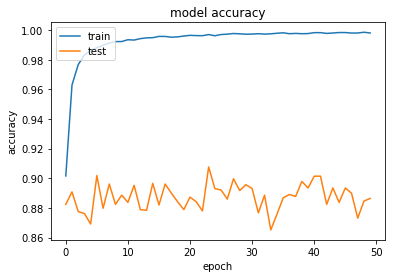

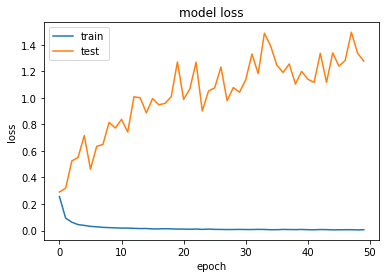

In [9]:
from keras.utils import np_utils
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Input
from keras.layers import Dropout, Flatten, Dense
from keras import backend as K
from keras.models import Model
import numpy as np
import matplotlib.pyplot as plt

epochs = 50
batch_size = 29
top_model_weights_path = 'bottleneck_fc_model.h5'
npyfile = np.load("bottleneck_features_train.npy")
a_size ,b_size,c_size,f_size,p_size,v_size = 1329,487,572,654,1395,435
ac_size ,bc_size,cc_size,fc_size,pc_size,vc_size = 58,60,64,75,64,56
train_data = npyfile['arr_0'] 
train_labels =np.array(([0] * int(a_size)) + ([1] * int(b_size)) + ([2] * int(c_size))
                      + ([3] * int(f_size))+ ([4] * int(p_size))+ ([5] * int(v_size)))

npyfile = np.load("bottleneck_features_validation.npy")
validation_data = npyfile['arr_0'] 
validation_labels = np.array(([0] * int(ac_size)) + ([1] * int(bc_size)) + ([2] * int(cc_size))
                            + ([3] * int(fc_size))+ ([4] * int(pc_size))+ ([5] * int(vc_size)))


train_labels = np_utils.to_categorical(train_labels, 6)
validation_labels = np_utils.to_categorical(validation_labels, 6)
model = Sequential()
model.add(Flatten(input_shape=train_data.shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='sigmoid'))

model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, train_labels,
              epochs=epochs,
              batch_size=batch_size,
              validation_data=(validation_data, validation_labels))
model.save_weights(top_model_weights_path)

# summarize history for accuracy
plt.plot(history.history[ 'acc' ])
plt.plot(history.history[ 'val_acc' ])
plt.title( 'model accuracy' )
plt.ylabel( 'accuracy' )
plt.xlabel( 'epoch' )
plt.legend([ 'train' , 'test' ], loc= 'upper left' )
plt.savefig('bottle_accuracy_graph.png')
plt.show()

# summarize history for loss
plt.plot(history.history[ 'loss' ])
plt.plot(history.history[ 'val_loss' ])
plt.title( 'model loss' )
plt.ylabel( 'loss' )
plt.xlabel( 'epoch' )
plt.legend([ 'train' , 'test' ], loc= 'upper left' )
plt.savefig('bottle_loss_graph.png')
plt.show()

In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K


# dimensions of our images.
img_width, img_height = 150, 150

train_data_dir = '/home/bhumihar/Programming/Python/opencv/sample/Marcel-train'
validation_data_dir = '/home/bhumihar/Programming/Python/opencv/sample/Marcel-test'
nb_train_samples = 4872
nb_validation_samples = 382
epochs = 50
batch_size = 16

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(6))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size)

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size)

Using TensorFlow backend.


Found 4872 images belonging to 6 classes.
Found 377 images belonging to 6 classes.


In [2]:
validation_generator

In [3]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)        18496     
__________

In [5]:
import numpy as np
npyfile = np.load("bottleneck_features_train.npy")
train_data = npyfile['arr_0'] 
np.shape(train_data)

(4872, 4, 4, 512)